<a href="https://colab.research.google.com/github/fahadshakeel23/DataScience/blob/main/E2E_Case_Study_Bancassurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**




## Context

Best insurance company and My Bank have set up a Bancassurance (Bancassurance is a relationship between a bank and an insurance company). Now using the data of liability customers of My Bank, The Best insurance company wants to convert customers with both a life insurance policy and an account in My bank to loan customers(taking a loan against a life insurance policy)

A campaign that the company ran last year for liability customers showed a healthy conversion rate of over 12.56% success. You are provided with data of customers who have an account in My bank and life insurance policy in the Best insurance company

You as a data scientist at the Best insurance company have to build a model to identify the positively responding customers who have a higher probability of purchasing the loan. This will increase the success ratio and reduce the cost of the campaign.

## Objective

* To predict whether a liability customer will buy loan.
* Which variables are most significant.
* Which segment of customers should be targeted more.

## Data Description

* cust_id: Unique Customer ID
* target: Field - 1: Responder, 0:  Non-Responder
* age: Customer Age (in years)
* gender: Male / Female / Other
* avg_balance: Monthly average balance
* occupation: Professional /  Salaried / Self Employed / Self Employed Non Professional.
* mrkt_score: Marketing Score
* holding_period: Duration (in days) to hold the  money
* acc_type: Account type (Current Account / Saving Account)
* acc_open_date: Account opening date
* len_rltnshp: Length of relationship (in  months)
* no_credit_txns: Number of credit transactions
* no_brch_cash_wdl: Number of branch cash withdrawal (debit transactions)
* no_atm_dbt_txns: Number of ATM debit transactions
* no_net_bnk_txns: Number of Net Banking debit transactions
* no_mbl_bnk_txns: Number of Mobile Banking debit transactions
* no_chq_dbt_txns: Number of cheque debit transactions
* cc_holder: Does the customer hold a Credit Card? - 1: Yes, 0: No
* amt_atm_dbt_txns: Amount withdrawn from an ATM
* amt_brch_cash_wdl: Amount cash withdrawn from the branch
* amt_chq_dbt_txns: Amount debited by cheque transactions
* amt_net_bnk_txns: Amount debited by Net Banking transactions
* amt_mbl_bnk_txns: Amount debited by Mobile Banking transactions
* charges: Flag - Has any banking charges
* nominee: Flag - Has Nominee - 1: Yes, 0: No
* old_loan: Flag - Has any earlier loan - 1: Yes, 0: No

# **Importing the necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

# **Loading the Dataset**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
Bank_data = pd.read_csv("My_Bank.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = Bank_data.copy()

# **Data Overview**

## View the first and last 5 rows of the dataset.

In [ ]:
data.head()

,cust_id,target,age,gender,avg_balance,occupation,mrkt_score,holding_period,acc_type,acc_open_date,len_rltnshp,no_credit_txns,no_brch_cash_wdl,no_atm_dbt_txns,no_net_bnk_txns,no_mbl_bnk_txns,no_chq_dbt_txns,cc_holder,amt_atm_dbt_txns,amt_brch_cash_wdl,amt_chq_dbt_txns,amt_net_bnk_txns,amt_mbl_bnk_txns,charges,nominee,old_loan
0,C7927,0,27,M,3383.75,SELF-EMP,776,30,SA,3/23/2005,146,7,0,1,2,0,0,0,13100,0,0,973557.0,0,0,1,1
1,C6877,0,47,M,287489.04,SAL,324,28,SA,10-11-2008,104,8,0,1,1,0,0,0,6600,0,0,799813.0,0,1,1,0
2,C19922,0,40,M,18216.88,SELF-EMP,603,2,SA,4/26/2012,61,10,1,1,1,0,2,0,11200,561120,49320,997570.0,0,1,1,1
3,C8183,0,53,M,71720.48,SAL,196,13,CA,07-04-2008,107,36,4,2,3,1,4,0,26100,673590,60780,741506.0,71388,0,1,0
4,C12123,0,36,M,1671622.89,PROF,167,24,SA,12/29/2001,185,20,1,0,0,0,0,0,0,808480,0,0.0,0,0,1,0


In [ ]:
data.tail()

,cust_id,target,age,gender,avg_balance,occupation,mrkt_score,holding_period,acc_type,acc_open_date,len_rltnshp,no_credit_txns,no_brch_cash_wdl,no_atm_dbt_txns,no_net_bnk_txns,no_mbl_bnk_txns,no_chq_dbt_txns,cc_holder,amt_atm_dbt_txns,amt_brch_cash_wdl,amt_chq_dbt_txns,amt_net_bnk_txns,amt_mbl_bnk_txns,charges,nominee,old_loan
19995,C4520,0,41,F,181029.01,SENP,598,15,SA,09-04-2003,165,4,1,0,0,0,2,0,0,277050,59460,0.0,0,0,1,1
19996,C10147,0,37,F,46624.98,SELF-EMP,299,11,SA,05-03-2013,49,17,4,2,3,1,4,0,17200,705740,24300,902772.0,46829,0,1,0
19997,C2392,0,30,M,142433.53,PROF,722,11,SA,11-01-2007,115,20,8,2,0,1,5,0,33400,83740,62210,0.0,132010,0,1,0
19998,C14659,0,46,M,394654.75,SAL,234,4,SA,8/22/2006,129,11,1,1,0,0,4,1,7700,195790,43550,0.0,0,0,1,0
19999,C12911,1,41,M,7152.60,SELF-EMP,561,12,SA,6/21/2014,35,10,1,1,0,0,4,1,15100,276520,61510,0.0,0,0,1,0


## Understand the shape of the dataset.

In [ ]:
data.shape

(20000, 26)

* The dataset has 20000 rows and 26 columns

## Check the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            20000 non-null  object 
 1   target             20000 non-null  int64  
 2   age                20000 non-null  int64  
 3   gender             20000 non-null  object 
 4   avg_balance        20000 non-null  float64
 5   occupation         20000 non-null  object 
 6   mrkt_score         20000 non-null  int64  
 7   holding_period     20000 non-null  int64  
 8   acc_type           20000 non-null  object 
 9   acc_open_date      20000 non-null  object 
 10  len_rltnshp        20000 non-null  int64  
 11  no_credit_txns     20000 non-null  int64  
 12  no_brch_cash_wdl   20000 non-null  int64  
 13  no_atm_dbt_txns    20000 non-null  int64  
 14  no_net_bnk_txns    20000 non-null  int64  
 15  no_mbl_bnk_txns    20000 non-null  int64  
 16  no_chq_dbt_txns    200

## Statistical summary of the dataset.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,20000.0,0.125600,0.331406,0.0,0.000,0.000,0.00,1.00
age,20000.0,38.418150,9.577985,21.0,30.000,38.000,46.00,55.00
avg_balance,20000.0,511362.192118,723592.961792,0.0,64754.025,231675.845,653876.85,8360430.57
mrkt_score,20000.0,440.150300,249.887582,100.0,227.000,364.000,644.00,999.00
holding_period,20000.0,14.955650,8.642634,1.0,7.000,15.000,22.00,31.00
len_rltnshp,20000.0,125.239300,54.953936,29.0,79.000,125.000,172.00,221.00
no_credit_txns,20000.0,12.348050,12.151921,0.0,6.000,10.000,14.00,75.00
no_brch_cash_wdl,20000.0,1.883000,2.263596,0.0,1.000,1.000,2.00,15.00
no_atm_dbt_txns,20000.0,1.028950,1.497239,0.0,0.000,1.000,1.00,25.00
no_net_bnk_txns,20000.0,1.172450,2.404246,0.0,0.000,0.000,1.00,22.00


* target: The dependent variable should be treated as a category.
* age: Average age of customers is 38 years, age of customers has a wide range from 21 to 55 years.
* avg_balance: Average balance a customer has in account monthly is 511362.192. The range of this attribute is very wide and the difference between the 75th percentile and the median value indicates that there might be outliers present in this attribute.
* mrkt_score: Average marketing score of customers is 440. The scores have a very wide range from 100 to 999. The difference between the 75th percentile and maximum value suggests that there might be outliers present in this attribute.
* len_rltnshp: 50% of the customers are with the bank from ~10.5 years.
* All the binary variables can be treated as objects/categories.

In [ ]:
cat_columns = [
    "cc_holder",
    "charges",
    "nominee",
    "old_loan",
    "gender",
    "occupation",
    "acc_type"
]
data[cat_columns] = data[cat_columns].astype("object")

In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
cust_id,20000,20000,C7927,1
gender,20000,3,M,14376
occupation,20000,4,SAL,5855
acc_type,20000,2,SA,15759
acc_open_date,20000,4869,11/16/2010,24
cc_holder,20000,2,0,13892
charges,20000,2,0,17788
nominee,20000,2,1,18023
old_loan,20000,2,0,10141


* cust_id: CustomerID can be dropped as it won't add any significance to our analysis.
* gender: Most customers are male.
* occuation: Most of the customers are salaried employees.
* acc_type: Most customers have a savings account.
* acc_open_date: should have a date-time data type. Also, we can extract year and month from the date which can give us more insights.
* cc_holder: Most customers do not have a credit card
* charges: Most customers do not have any pending banking charges
* nominee: Mos customers have a nominee
* old_loan: Most customers do not have an old loan.

## Checking for duplicate values

In [ ]:
data.duplicated().sum()

0

*  There are no duplicate values in the dataset

## Check for missing values

In [ ]:
data.isnull().sum()

,0
cust_id,0
target,0
age,0
gender,0
avg_balance,0
occupation,0
mrkt_score,0
holding_period,0
acc_type,0
acc_open_date,0


* There are no missing values in the dataset.

## Feature Engineering

In [ ]:
# dropping CustomerID
data.drop(["cust_id"], axis=1, inplace=True)

**Extracting month and year from acc_open_date column as a specific date might not be much helpful as compared to the month and the year values.**

In [ ]:
data["acc_open_year"] = pd.DatetimeIndex(data["acc_open_date"]).year
data["acc_open_month"] = pd.DatetimeIndex(data["acc_open_date"]).month
data.drop(["acc_open_date"], axis=1, inplace=True)

In [ ]:
data["acc_open_year"].value_counts()

,count
acc_open_year,
2010,1321
2007,1315
2003,1313
2004,1307
2000,1276
2013,1276
2006,1273
2009,1272
2002,1269


In [ ]:
data["acc_open_month"].value_counts()

,count
acc_open_month,
9,1795
5,1749
3,1711
12,1707
7,1684
8,1680
1,1651
11,1639
4,1637


* Most of the accounts were opened in 2010 and in September.

**We can combine various forms of debit transactions column to create two columns: One with number of debit transactions and another with Amount of debit transactions. It will help simplify the data.**

* Columns: 'no_brch_cash_wdl', 'no_atm_dbt_txns', 'no_net_bnk_txns', 'no_mbl_bnk_txns', 'no_chq_dbt_txns' represent the number of debit transactions from different sources we can combine these columns to create one single column that has information on the total number of debit transactions.

* Columns: 'amt_atm_dbt_txns', 'amt_brch_cash_wdl', 'amt_chq_dbt_txns', 'amt_net_bnk_txns', 'amt_mbl_bnk_txns' represent amount  of debit transactions from different sources we can combine these columns to create one single column that has information of total amount of debit transactions

In [ ]:
data["no_debit_txns"] = (
    data["no_brch_cash_wdl"]
    + data["no_atm_dbt_txns"]
    + data["no_net_bnk_txns"]
    + data["no_mbl_bnk_txns"]
    + data["no_chq_dbt_txns"]
)

data["amt_debit_txns"] = (
    data["amt_brch_cash_wdl"]
    + data["amt_atm_dbt_txns"]
    + data["amt_net_bnk_txns"]
    + data["amt_mbl_bnk_txns"]
    + data["amt_chq_dbt_txns"]
)

**Dropping the columns which were used in creating total number of debit transactions and total amount of debit transactions**

In [ ]:
data.drop(
    [
        "no_brch_cash_wdl",
        "no_atm_dbt_txns",
        "no_net_bnk_txns",
        "no_mbl_bnk_txns",
        "no_chq_dbt_txns",
        "amt_brch_cash_wdl",
        "amt_atm_dbt_txns",
        "amt_net_bnk_txns",
        "amt_mbl_bnk_txns",
        "amt_chq_dbt_txns",
    ],
    axis=1,
    inplace=True,
)

# **Exploratory Data Analysis (EDA)**

---



## Functions for EDA

**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

### Observations on target

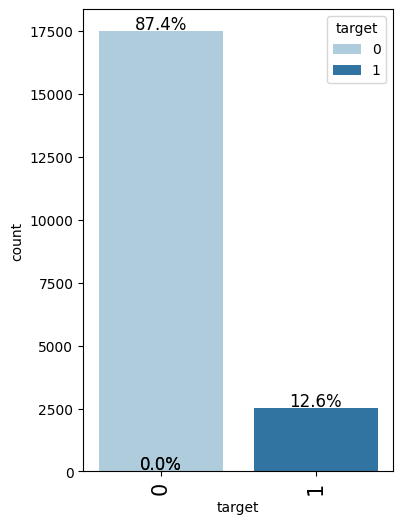

In [ ]:
labeled_barplot(data, "target", perc = True)

*  "target" is the dependent variable here with 2 classes with only 12.6% people being responders(i.e. belonging to class 1)

### Observations on age

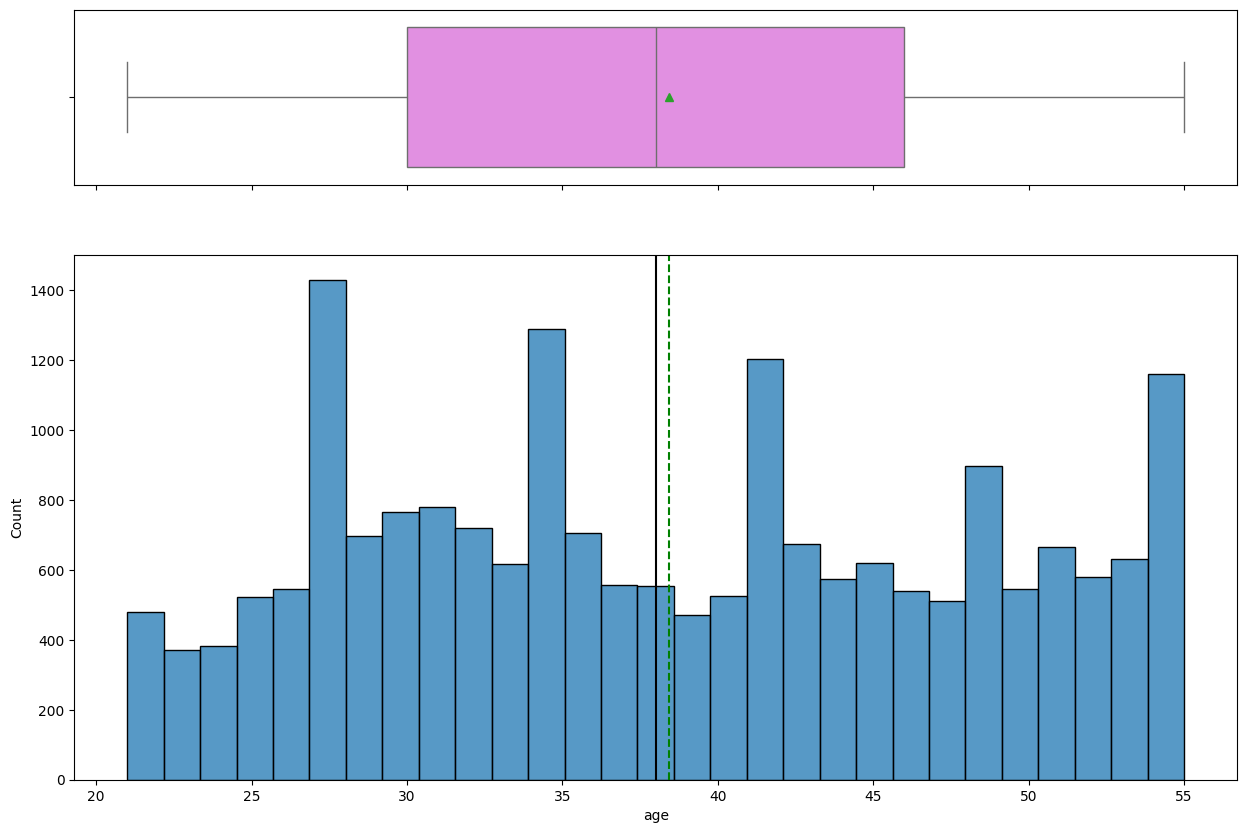

In [ ]:
histogram_boxplot(data, "age")

*  age is a continuous variable with a minimum value of 21 years and the maximum being 55, with the mean value being 38.41

### Observations on gender

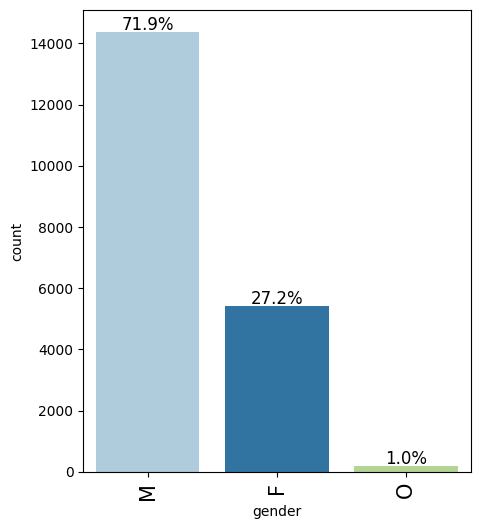

In [ ]:
labeled_barplot(data, "gender", perc = True)

*  gender has 3 categories, 72% people are male, 27% being female and 1% other

### Observations on avg_balance

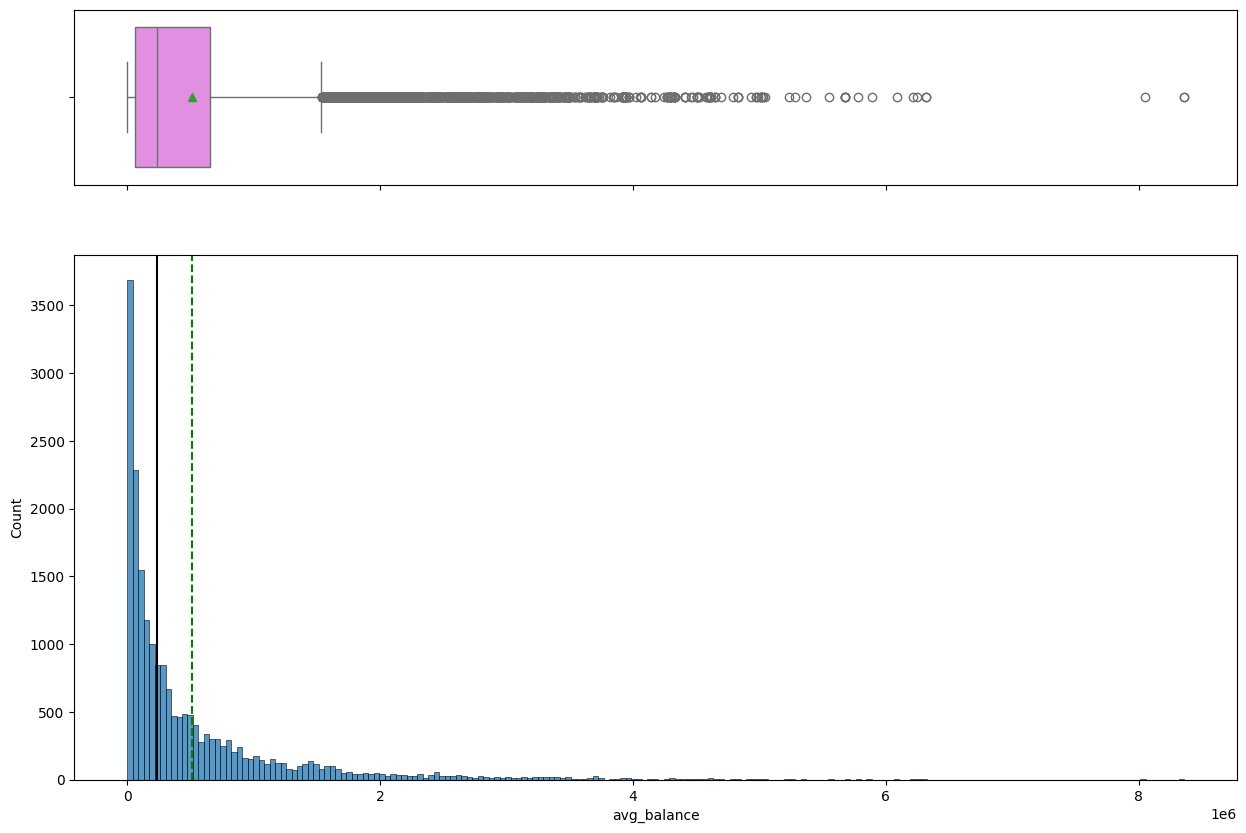

In [ ]:
histogram_boxplot(data, "avg_balance")

*  avg_balance is a continuous variable with values ranging from 0 to 8360430.57, also avg_balance seems to be right skewed

### Observations on occupation

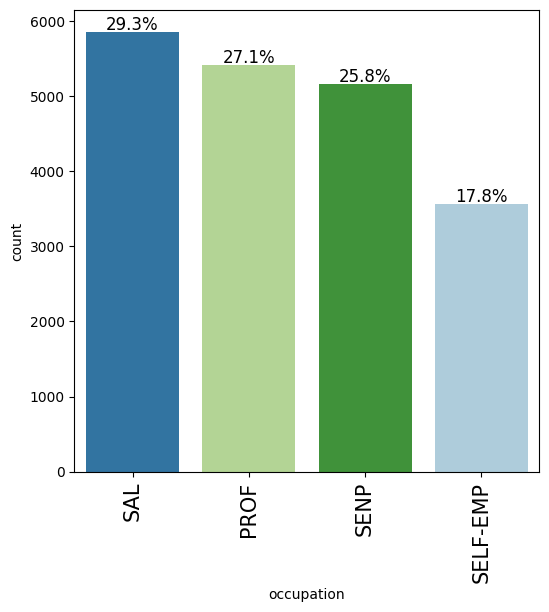

In [ ]:
labeled_barplot(data, "occupation", perc = True)

*  occupation is a categorical variable with 4 classes, most of the people being salaried followed by Professional, Self Employed Non Professional, and Self Employed

### Observations on mrkt_score

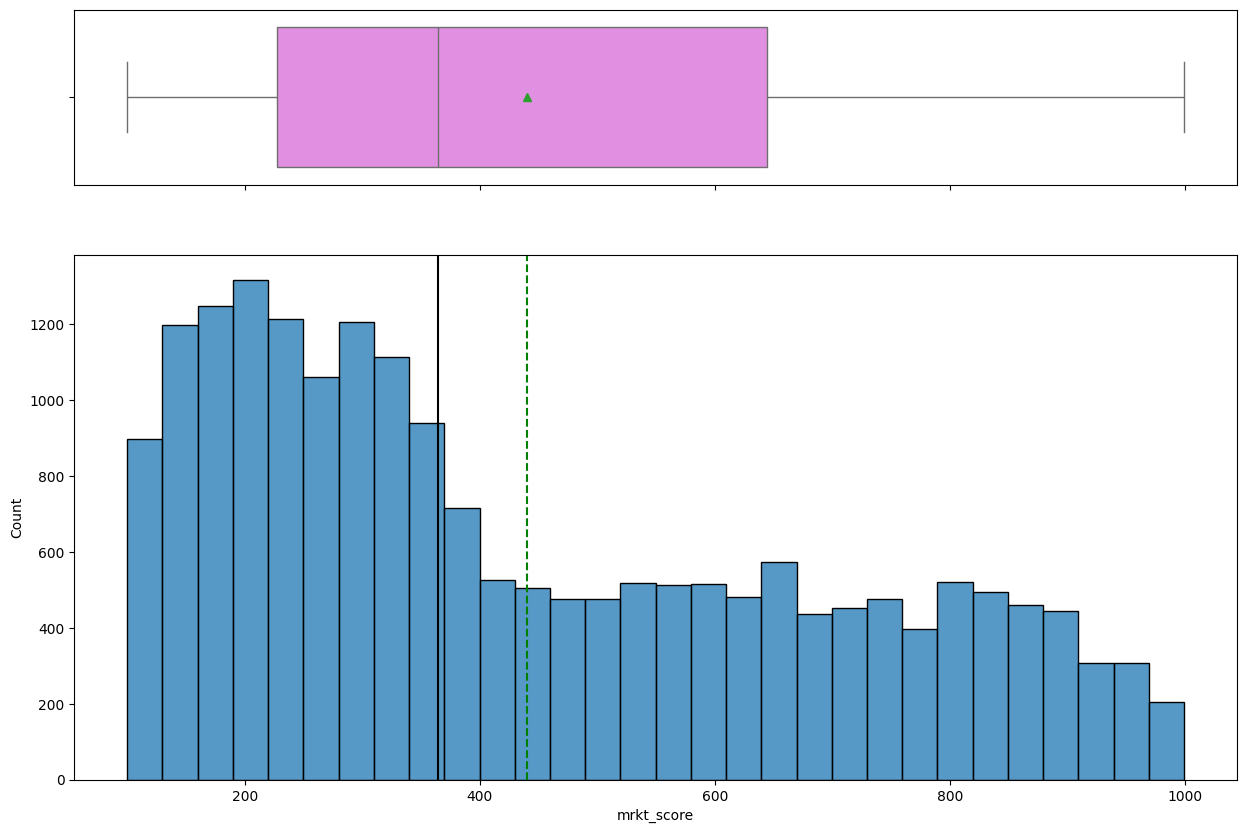

In [ ]:
histogram_boxplot(data, "mrkt_score")

*  mrkt_score is a continuous variable, with values ranging from 100 to 999, mrkt_score is a little right-skewed

### Observations on holding_period

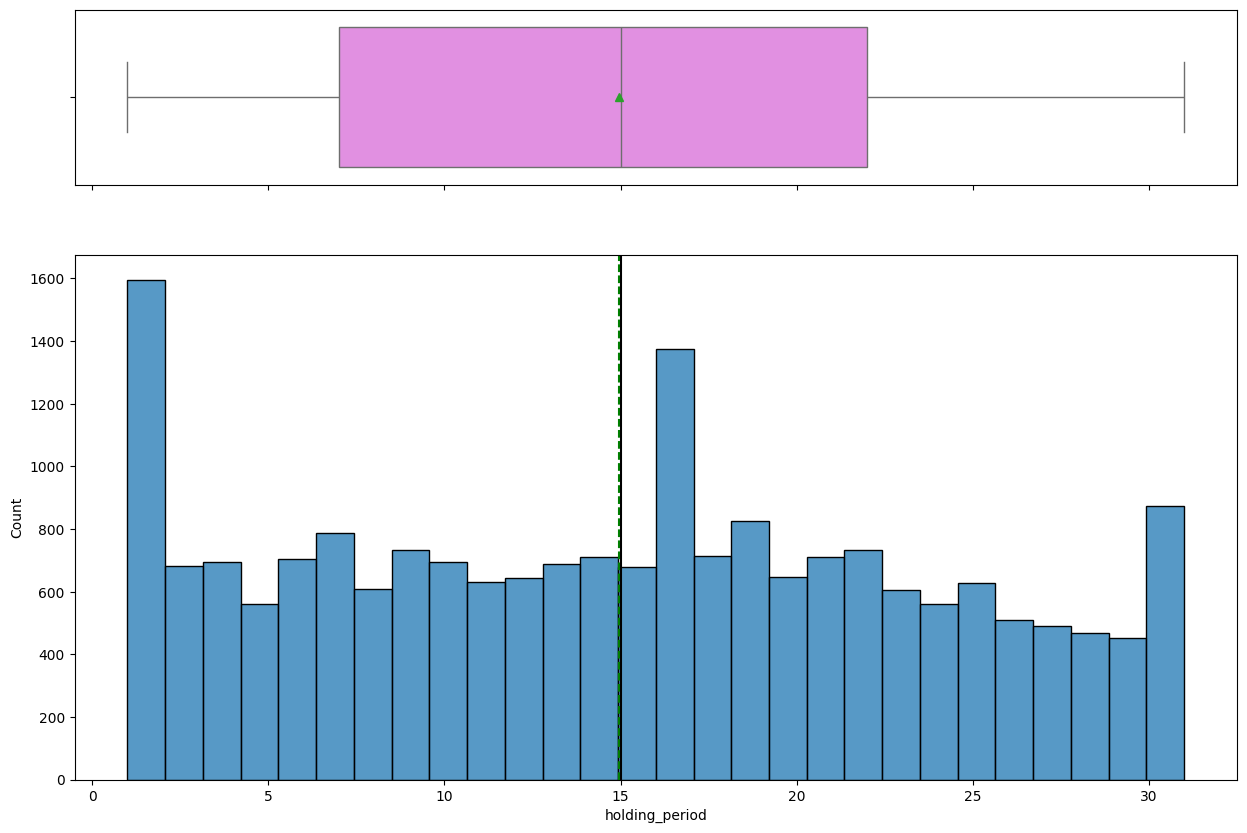

In [ ]:
histogram_boxplot(data, "holding_period")

*  holding_period is also a continuous variable with values ranging from 1 and 31 with mean value being ~15

### Observations on acc_type

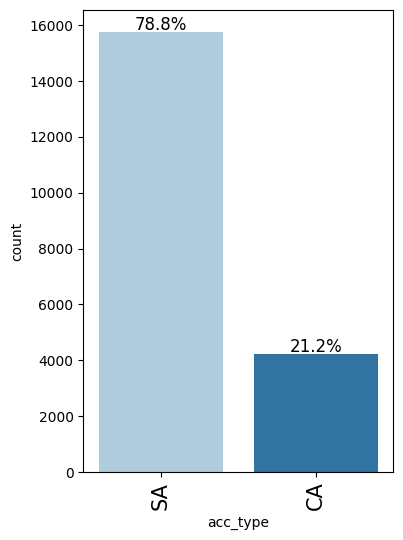

In [ ]:
labeled_barplot(data, "acc_type", perc = True)

*  acc_type is a categorical variable with 2 classes, where most people have savings account and only ~21% has current account

### Observations on len_rltnshp

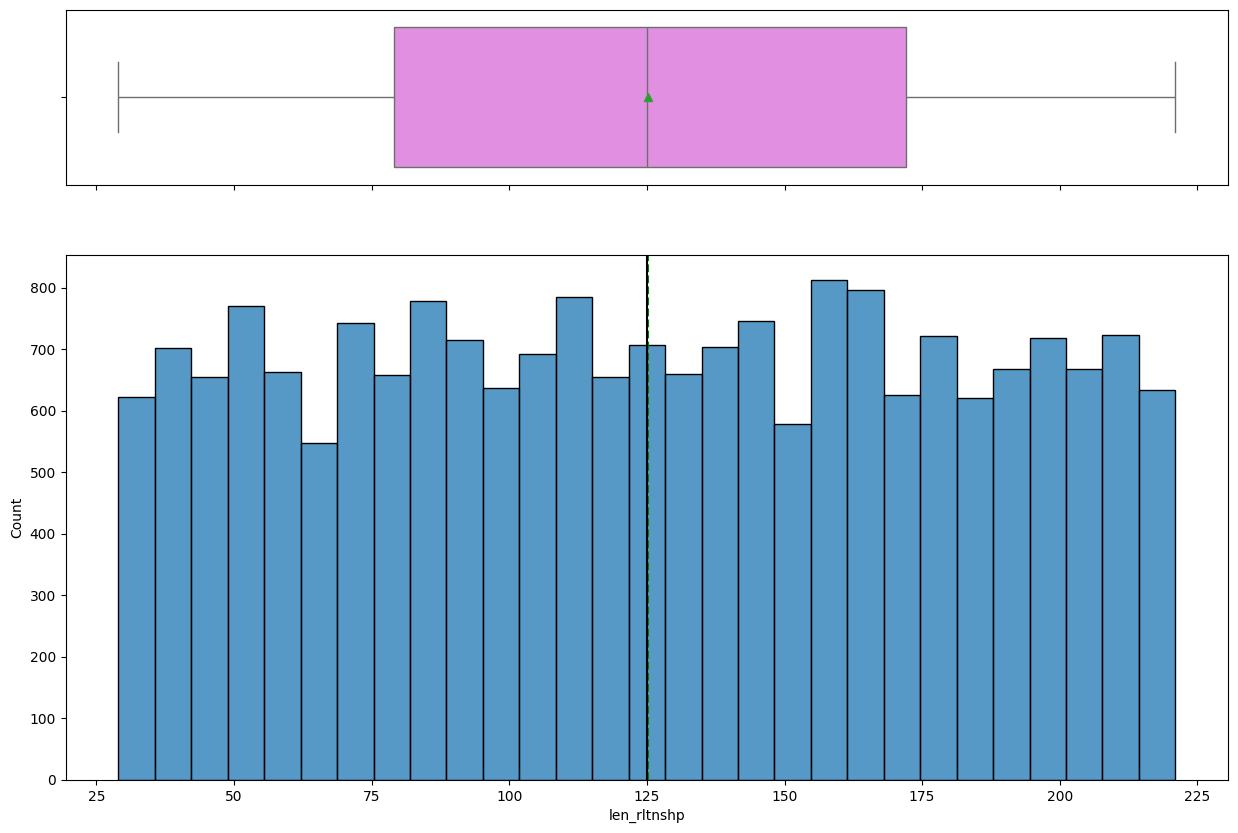

In [ ]:
histogram_boxplot(data, "len_rltnshp")

*  len_rltnshp is a continuous variable, values varying from 29 to 221. The mean value is around 125 months

### Observations on no_credit_txns

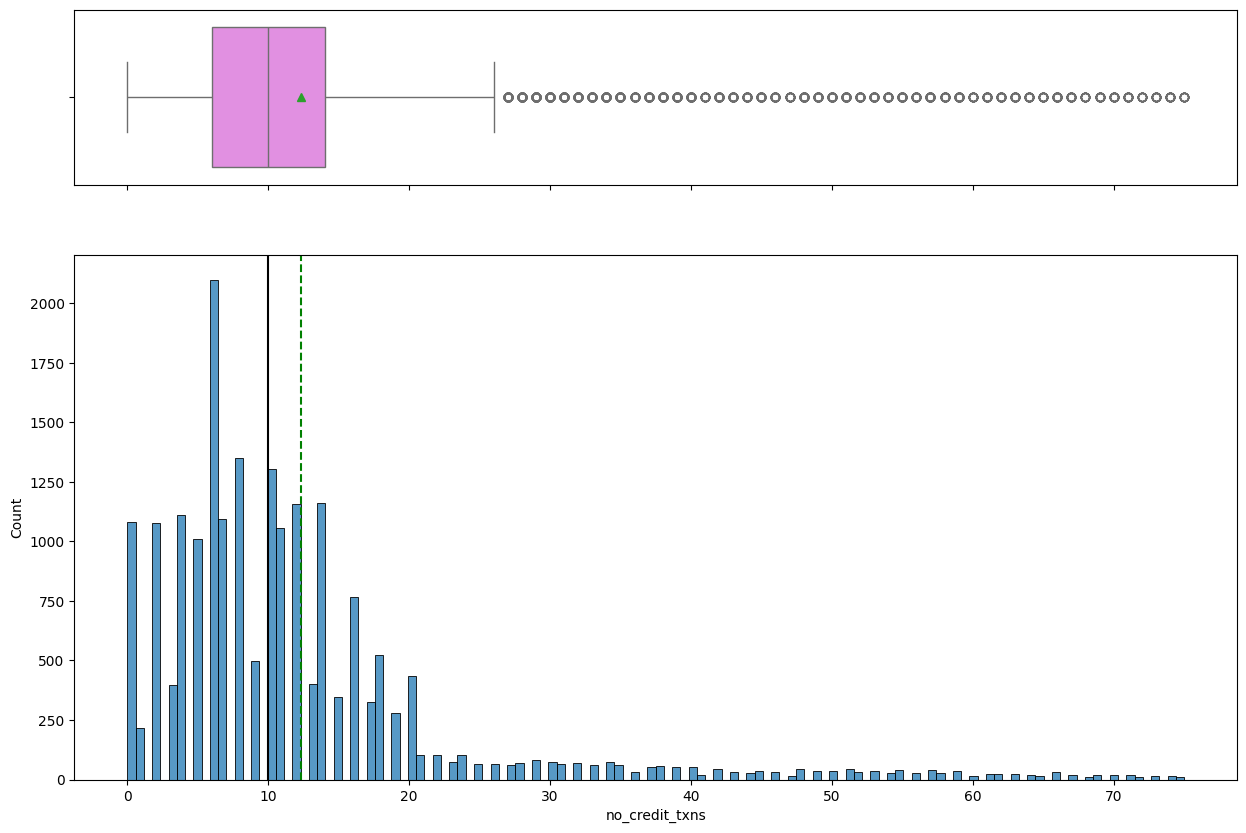

In [ ]:
histogram_boxplot(data, "no_credit_txns")

*  no_credit_txns is a continuous variable, values varying from 0 to 75, variable seems to be right skewed

### Observations on no_debit_txns

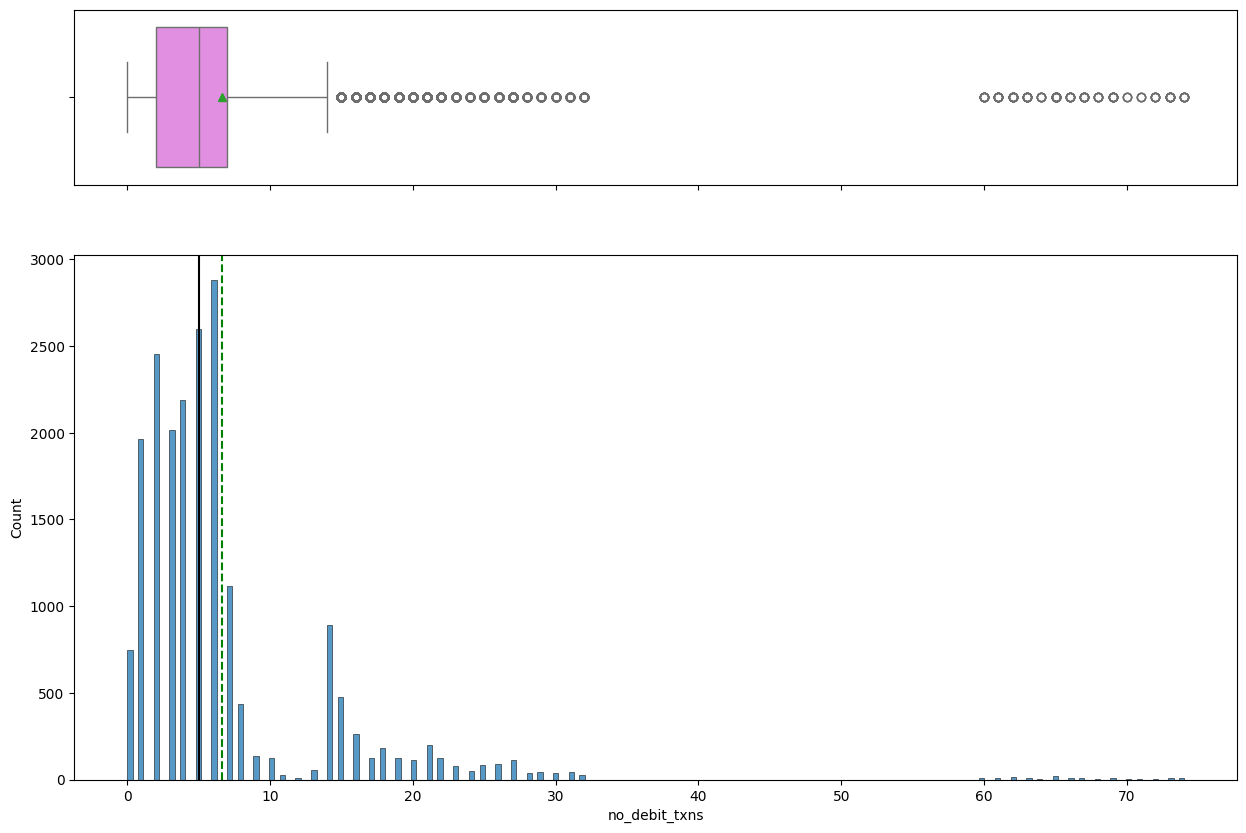

In [ ]:
histogram_boxplot(data, "no_debit_txns")

*  no_debit_txns is a continuous variable, values varying from 0 to ~75, variable seems to be right skewed

### Observations on amt_debit_txns

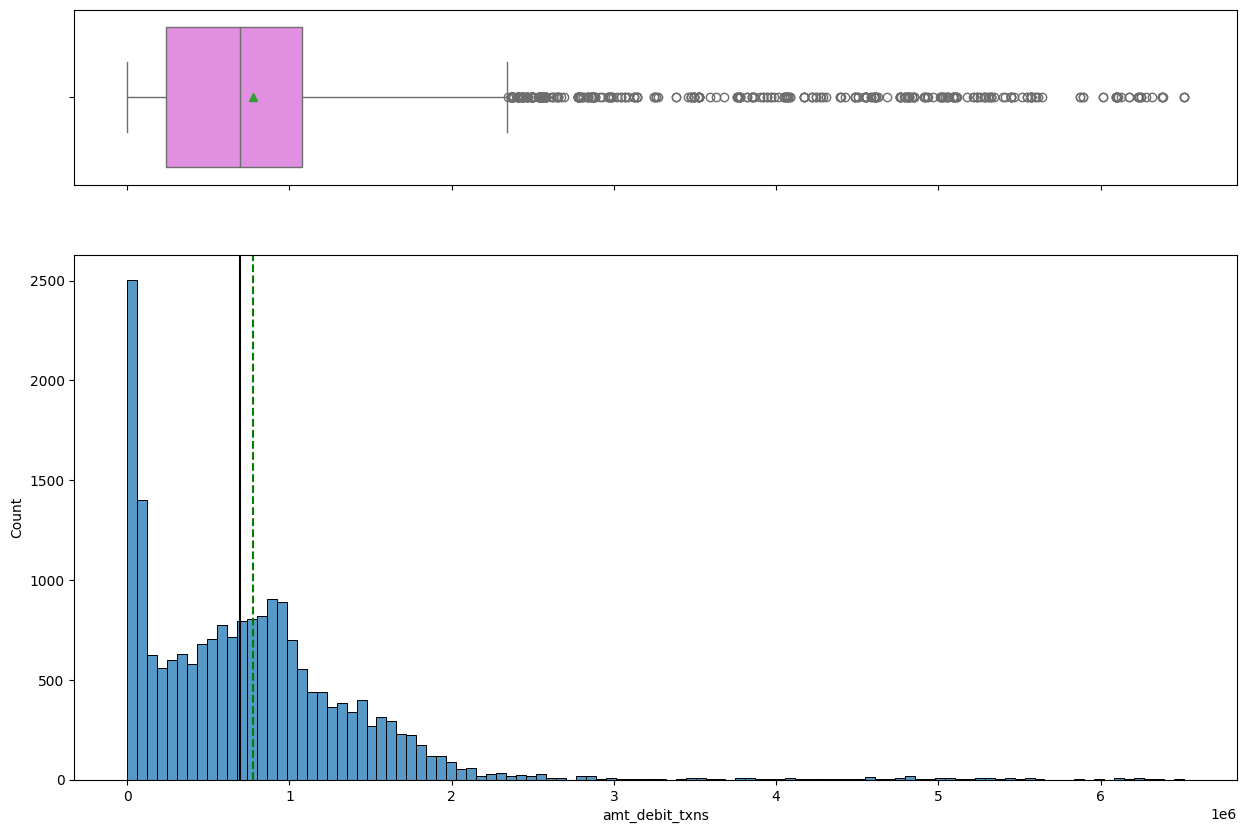

In [ ]:
histogram_boxplot(data, "amt_debit_txns")

*  amt_debit_txns has values ranging from 0 to ~$6.5 million. The distribution seems to be right skewed.

### Observations on cc_holder

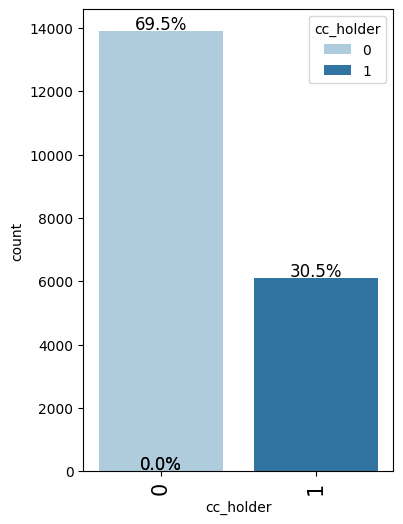

In [ ]:
labeled_barplot(data, "cc_holder", perc = True)

*  ~70% people don't have a credit card

### Observations on charges

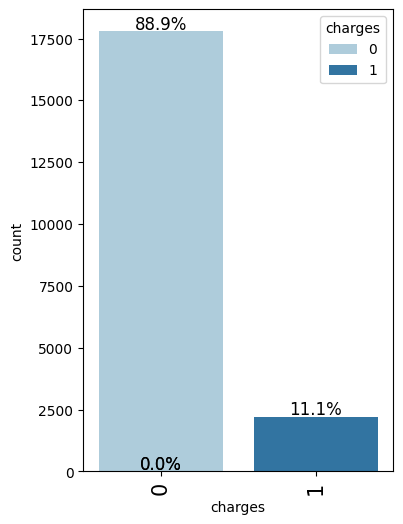

In [ ]:
labeled_barplot(data, "charges", perc = True)

*  ~89% people don't have any banking charges

### Observations on nominee

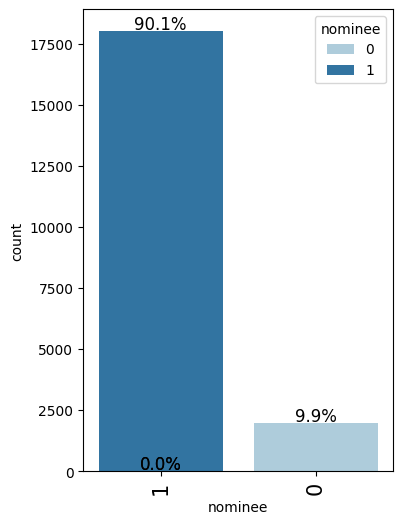

In [ ]:
labeled_barplot(data, "nominee", perc = True)

~90% of people have a nominee

### Observations on old_loan

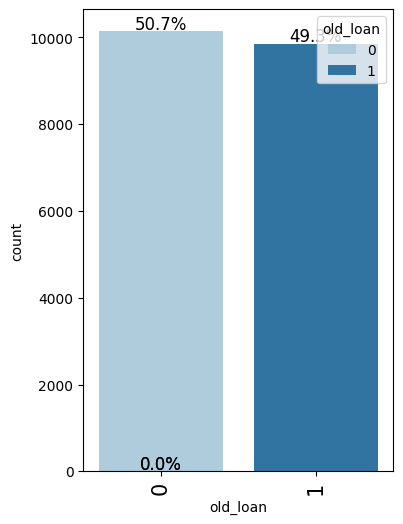

In [ ]:
labeled_barplot(data, "old_loan", perc = True)

*  No. of people having an old loan is very similar to people not having an old loan

## Bivariate Analysis

### Correlation Analysis

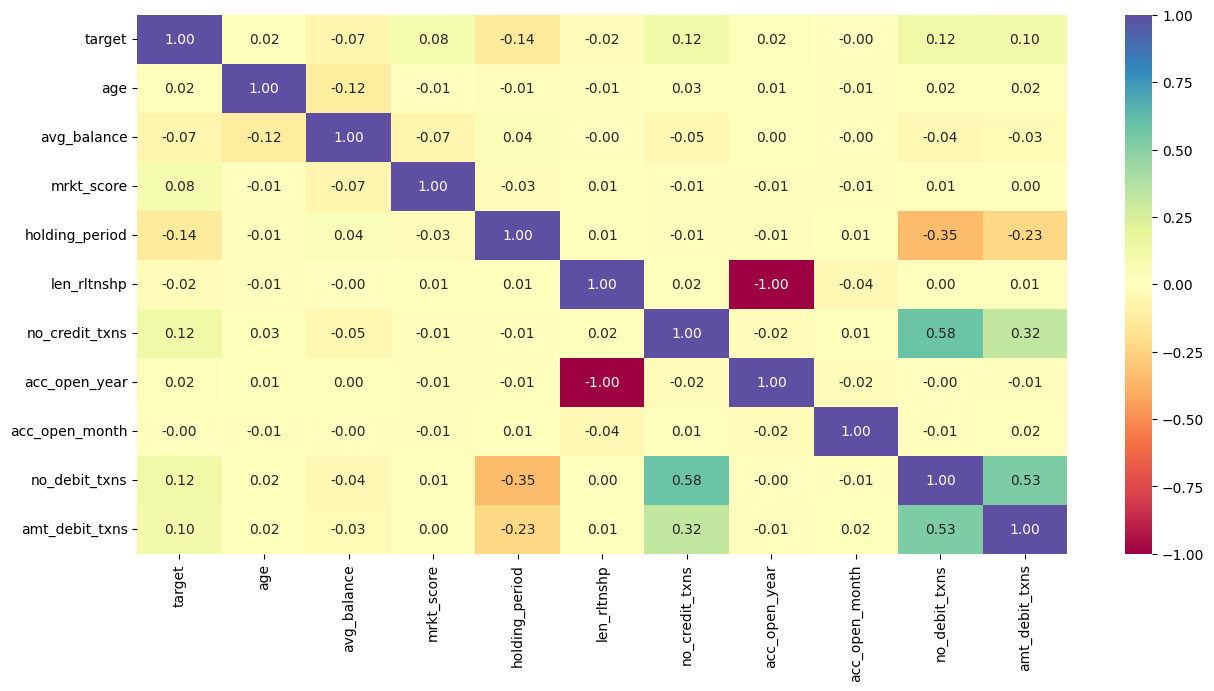

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Account opening year and Length of relationship with bank are highly negatively correlated, we have to drop one of these variables.
* Number of debit transactions and number of credit transactions from ATM have some correlation which makes sense. Similarly Number of debit transactions and Amount of debited transactions have some correlation which makes sense.

In [ ]:
## Dropping acc_open_year
data = data.drop(["acc_open_year"], axis=1)

### Observations on target vs gender

target      0     1    All
gender                    
All     17488  2512  20000
M       12446  1930  14376
F        4893   540   5433
O         149    42    191
------------------------------------------------------------------------------------------------------------------------


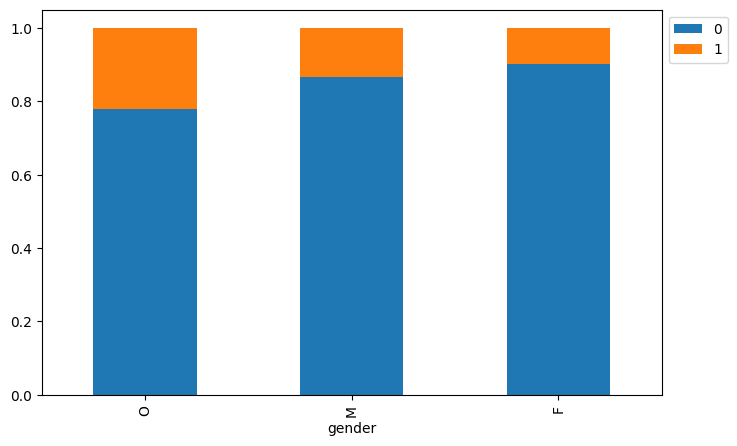

In [ ]:
stacked_barplot(data, "gender", "target")

* 20% of the customers from "Other" gender responded positively more than the male and female genders.
* Followed by "Other" gender customers males show a ~15% of positive response.

### Observations on target vs occupation

target          0     1    All
occupation                    
All         17488  2512  20000
SELF-EMP     2843   725   3568
PROF         4762   655   5417
SAL          5265   590   5855
SENP         4618   542   5160
------------------------------------------------------------------------------------------------------------------------


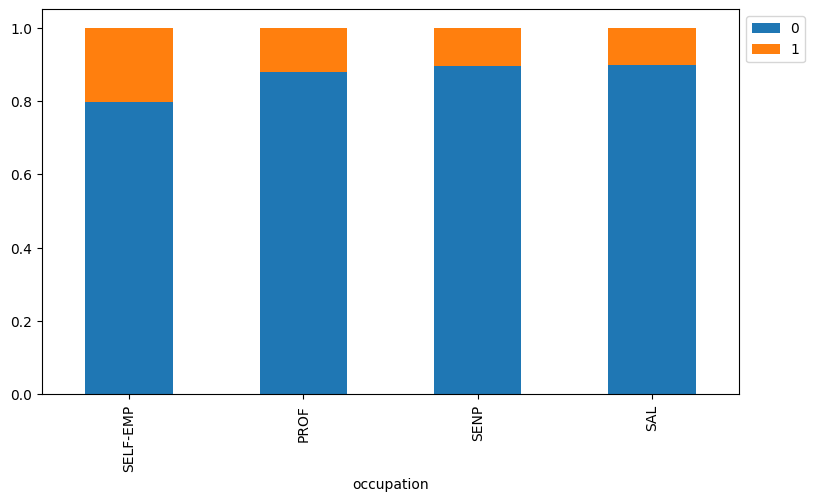

In [ ]:
stacked_barplot(data, "occupation", "target")

* 20% of the self-employed customers responded positively followed by professionals.
* Salaried customers are the ones who respond the least.

### Observations on target vs acc_type

target        0     1    All
acc_type                    
All       17488  2512  20000
SA        13965  1794  15759
CA         3523   718   4241
------------------------------------------------------------------------------------------------------------------------


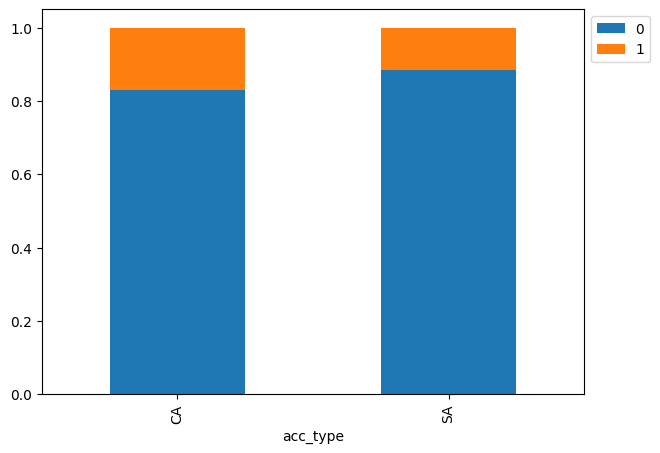

In [ ]:
stacked_barplot(data, "acc_type", "target")

* ~20% of the current account holding customers responded positively.
* A very few customers having savings account responded positively.

### Observations on target vs charges

target       0     1    All
charges                    
All      17488  2512  20000
0        15649  2139  17788
1         1839   373   2212
------------------------------------------------------------------------------------------------------------------------


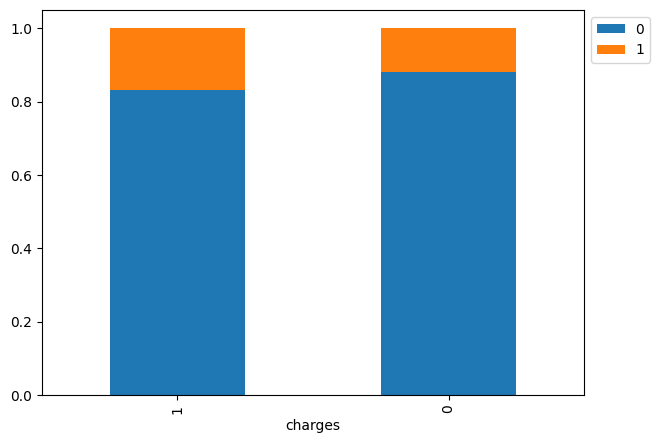

In [ ]:
stacked_barplot(data, "charges", "target")

* Customers who have banking charges responded positively as compared to the customers who don't have banking charges.

### Observations on target vs nominee

target       0     1    All
nominee                    
All      17488  2512  20000
1        15736  2287  18023
0         1752   225   1977
------------------------------------------------------------------------------------------------------------------------


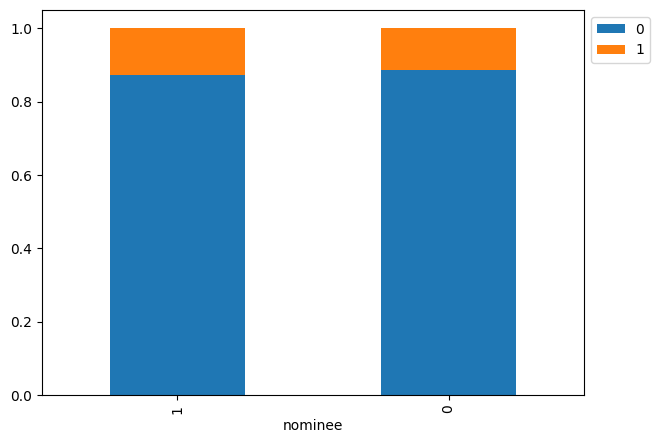

In [ ]:
stacked_barplot(data, "nominee", "target")

* There's not much difference between both the classes.

### Observations on target vs cc_holder

target         0     1    All
cc_holder                    
All        17488  2512  20000
0          12454  1438  13892
1           5034  1074   6108
------------------------------------------------------------------------------------------------------------------------


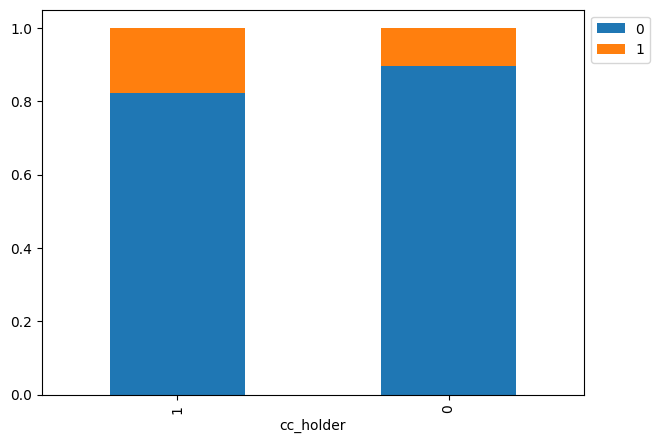

In [ ]:
stacked_barplot(data, "cc_holder", "target")

* Customers who have a credit card responded positively (~20%) as compared to the customers who do not have a credit card.

### Observations on target vs old_loan

target        0     1    All
old_loan                    
All       17488  2512  20000
0          8829  1312  10141
1          8659  1200   9859
------------------------------------------------------------------------------------------------------------------------


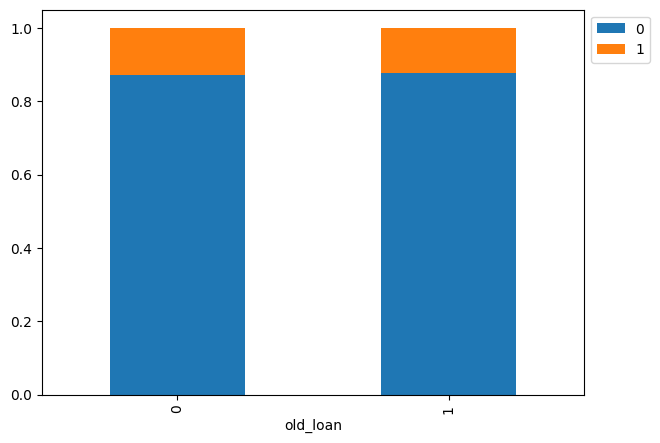

In [ ]:
stacked_barplot(data, "old_loan", "target")

* There's not much difference between the customers who have a loan previously and who don't.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Observations on target vs age

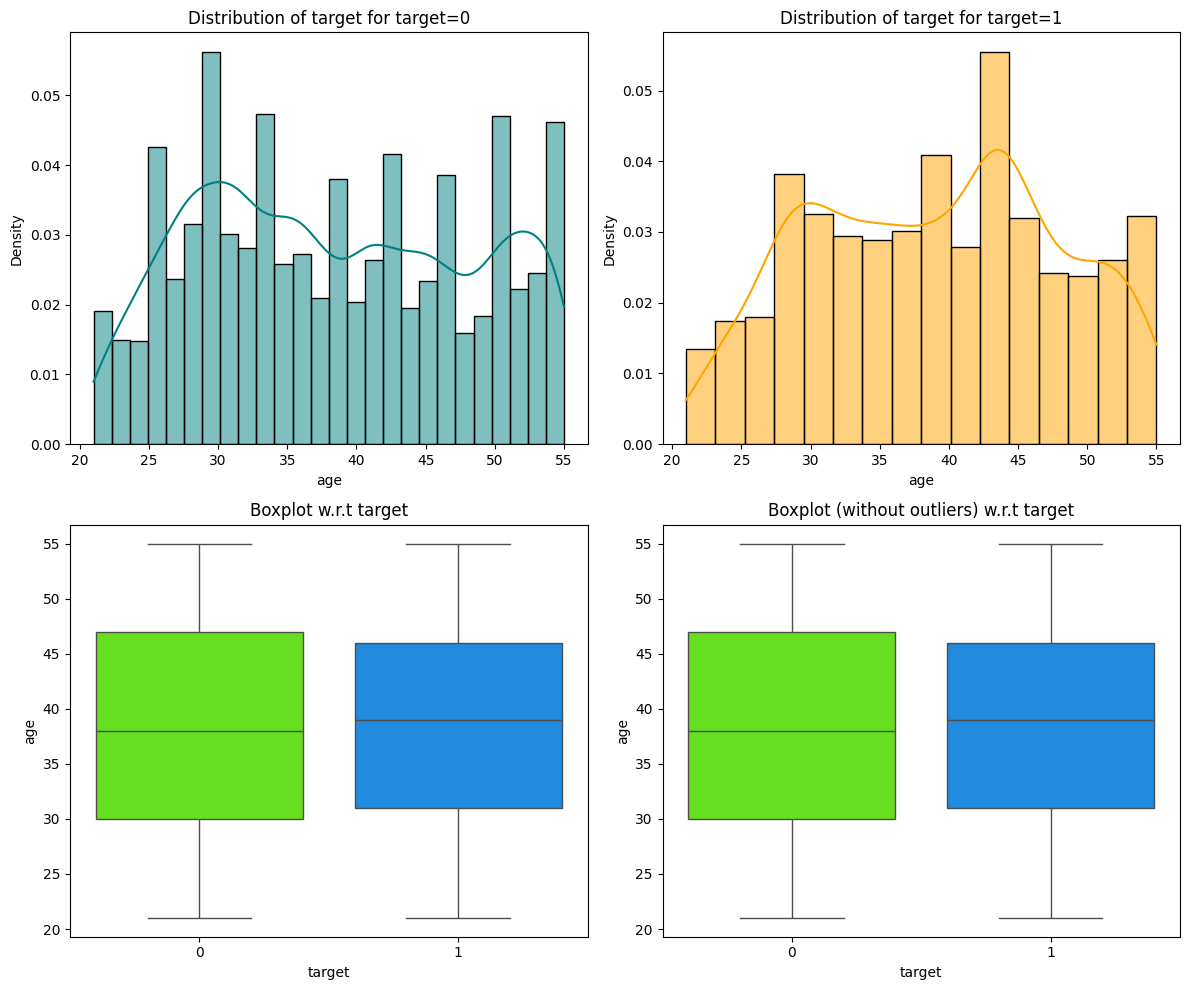

In [ ]:
distribution_plot_wrt_target(data, "age", "target")

* There is not much difference between age of a responder and non-responder.

### Observations on target vs len_rltnshp

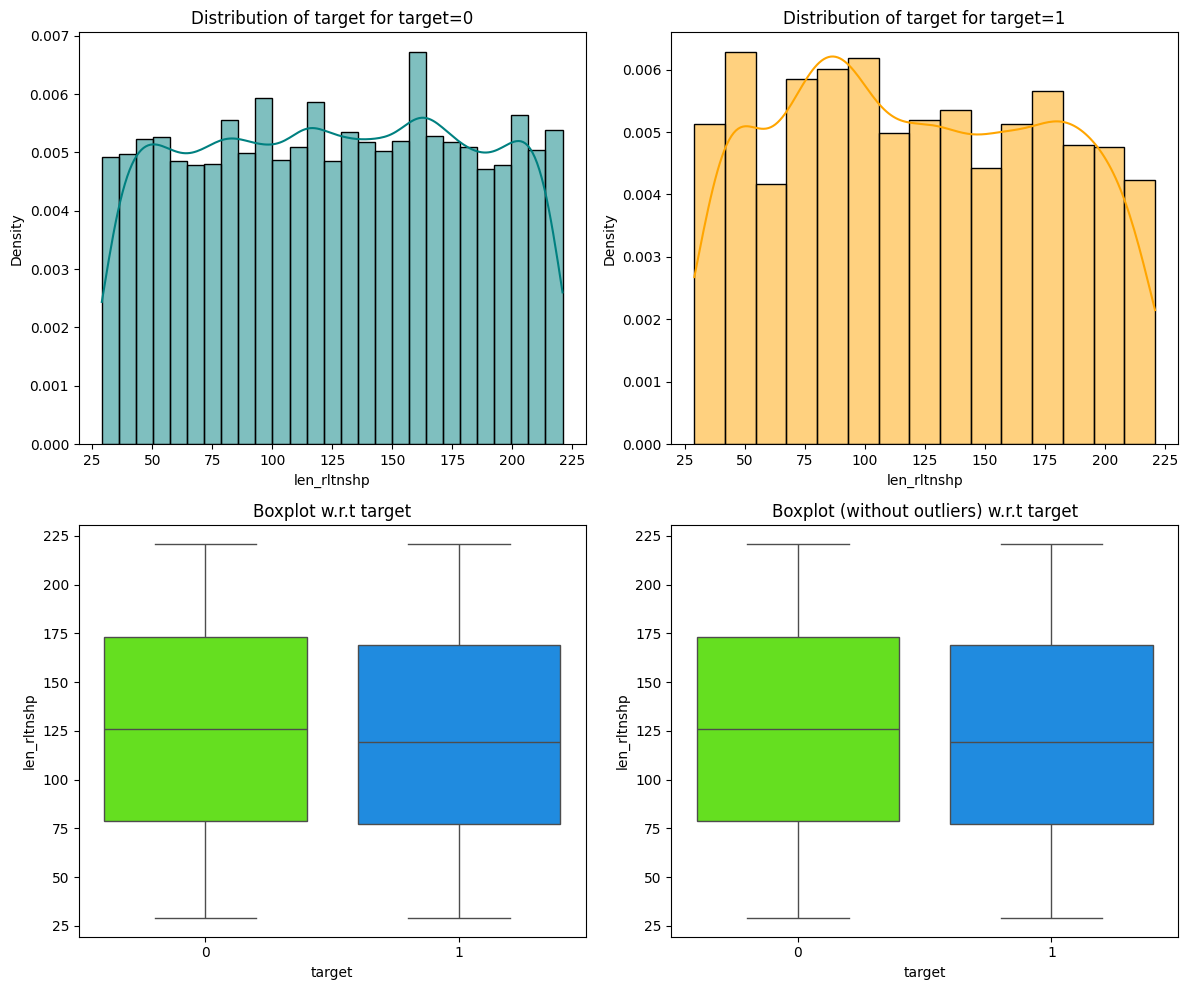

In [ ]:
distribution_plot_wrt_target(data, "len_rltnshp", "target")

* There is not much difference between the length of relationship of a responder and a non-responder.

### Observations on target vs no_debit_txns

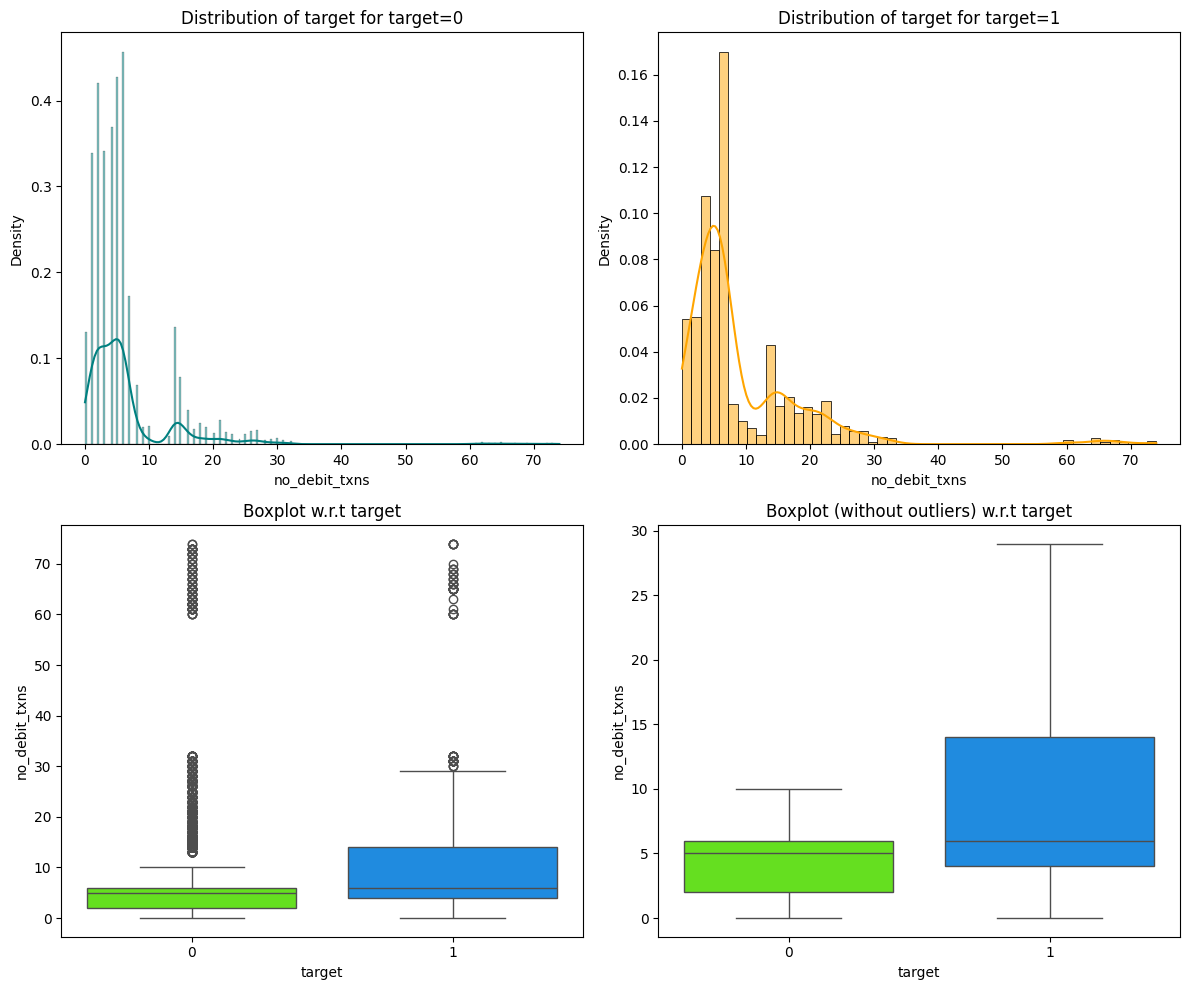

In [ ]:
distribution_plot_wrt_target(data, "no_debit_txns", "target")

* Higher the number of debit transactions, higher are the chances of being a responder.

### Observations on target vs avg_balance

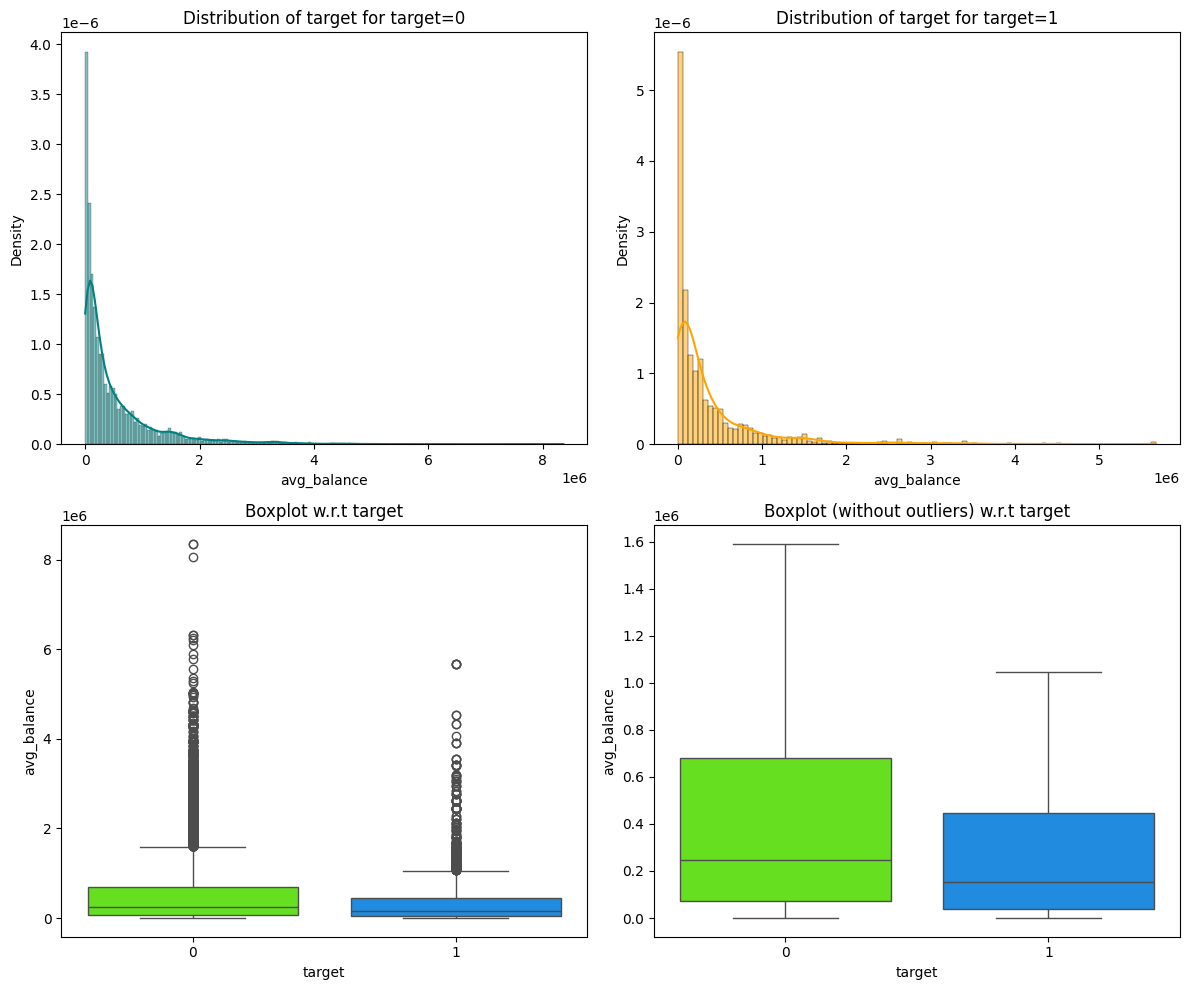

In [ ]:
distribution_plot_wrt_target(data, "avg_balance", "target")

* Customers who had a less monthly average balance responded positively.

### Observations on target vs mrkt_score

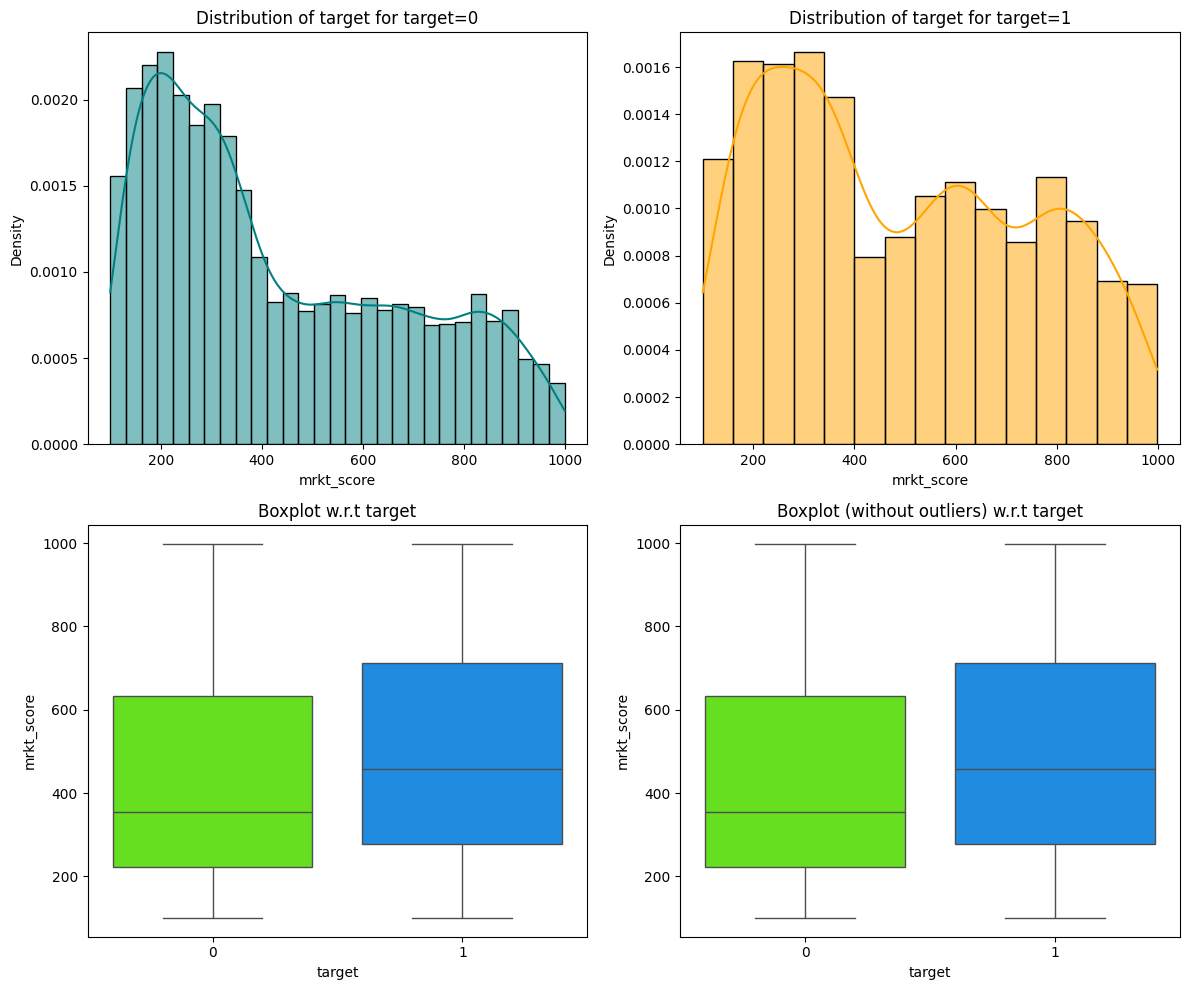

In [ ]:
distribution_plot_wrt_target(data, "mrkt_score", "target")

* Customers with a higher marketing score responded positively.

### Observations on target vs no_credit_txns

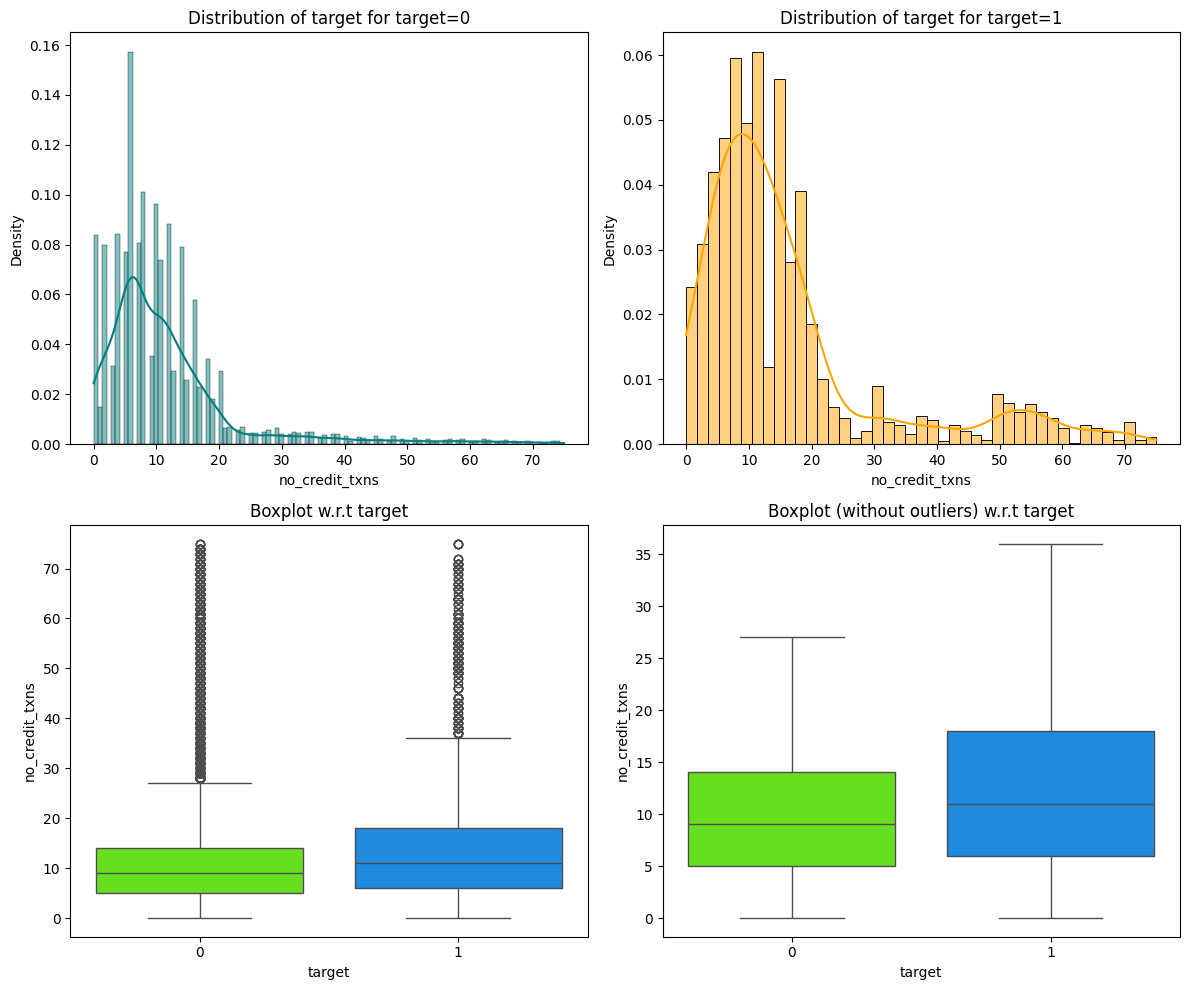

In [ ]:
distribution_plot_wrt_target(data, "no_credit_txns", "target")

* Higher the number of credit transactions higher are the chances of a customer responding positively.

### Observations on target vs amt_debit_txns

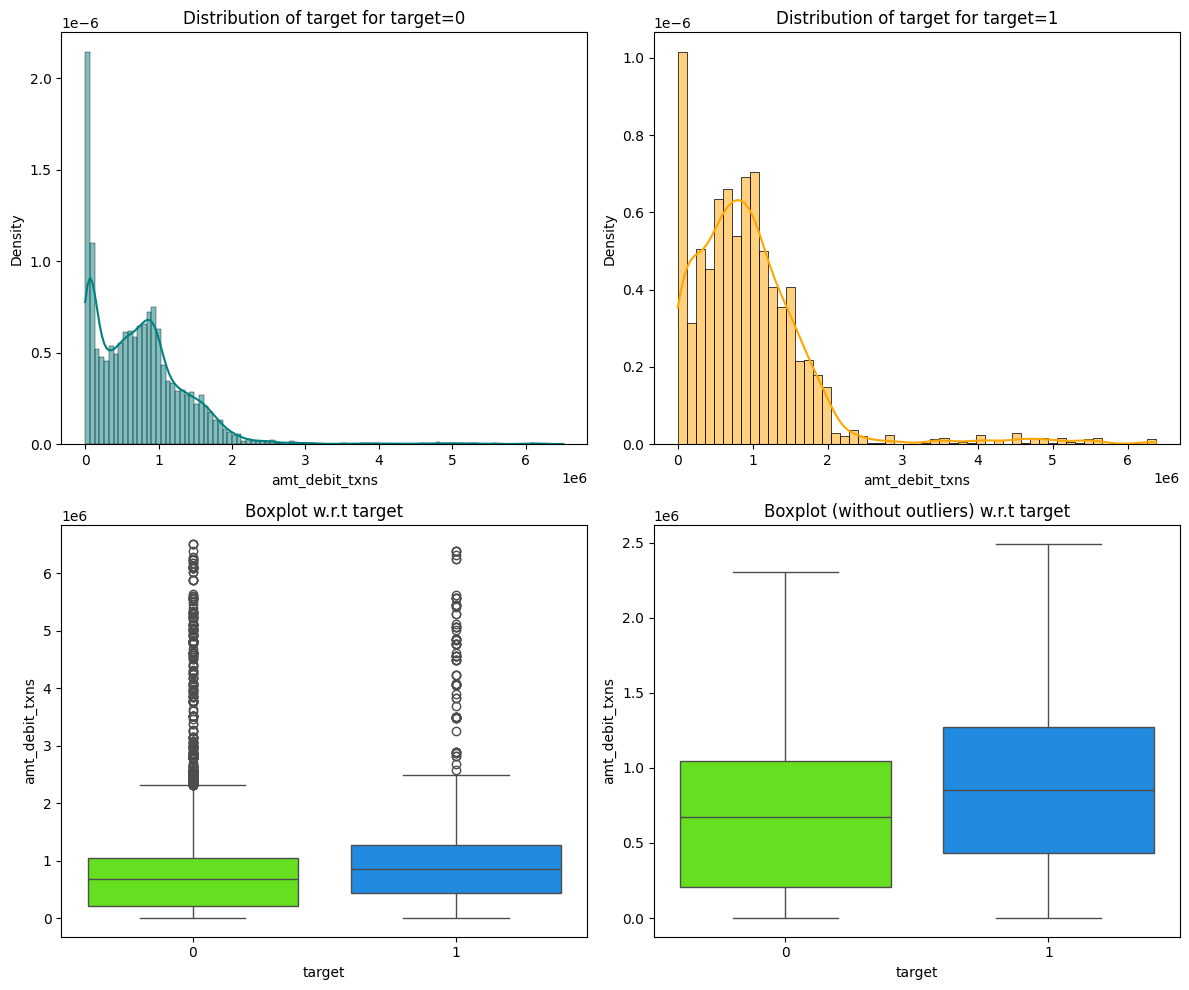

In [ ]:
distribution_plot_wrt_target(data, "amt_debit_txns", "target")

* Higher the amount of debit transaction higher are the chances of being a responder.

# **Data Preprocessing**

In [ ]:
data.head()

,target,age,gender,avg_balance,occupation,mrkt_score,holding_period,acc_type,len_rltnshp,no_credit_txns,cc_holder,charges,nominee,old_loan,acc_open_month,no_debit_txns,amt_debit_txns
0,0,27,M,3383.75,SELF-EMP,776,30,SA,146,7,0,0,1,1,3,3,986657.0
1,0,47,M,287489.04,SAL,324,28,SA,104,8,0,1,1,0,10,2,806413.0
2,0,40,M,18216.88,SELF-EMP,603,2,SA,61,10,0,1,1,1,4,5,1619210.0
3,0,53,M,71720.48,SAL,196,13,CA,107,36,0,0,1,0,7,14,1573364.0
4,0,36,M,1671622.89,PROF,167,24,SA,185,20,0,0,1,0,12,1,808480.0


### Outlier Check

- Let's check for outliers in the data.

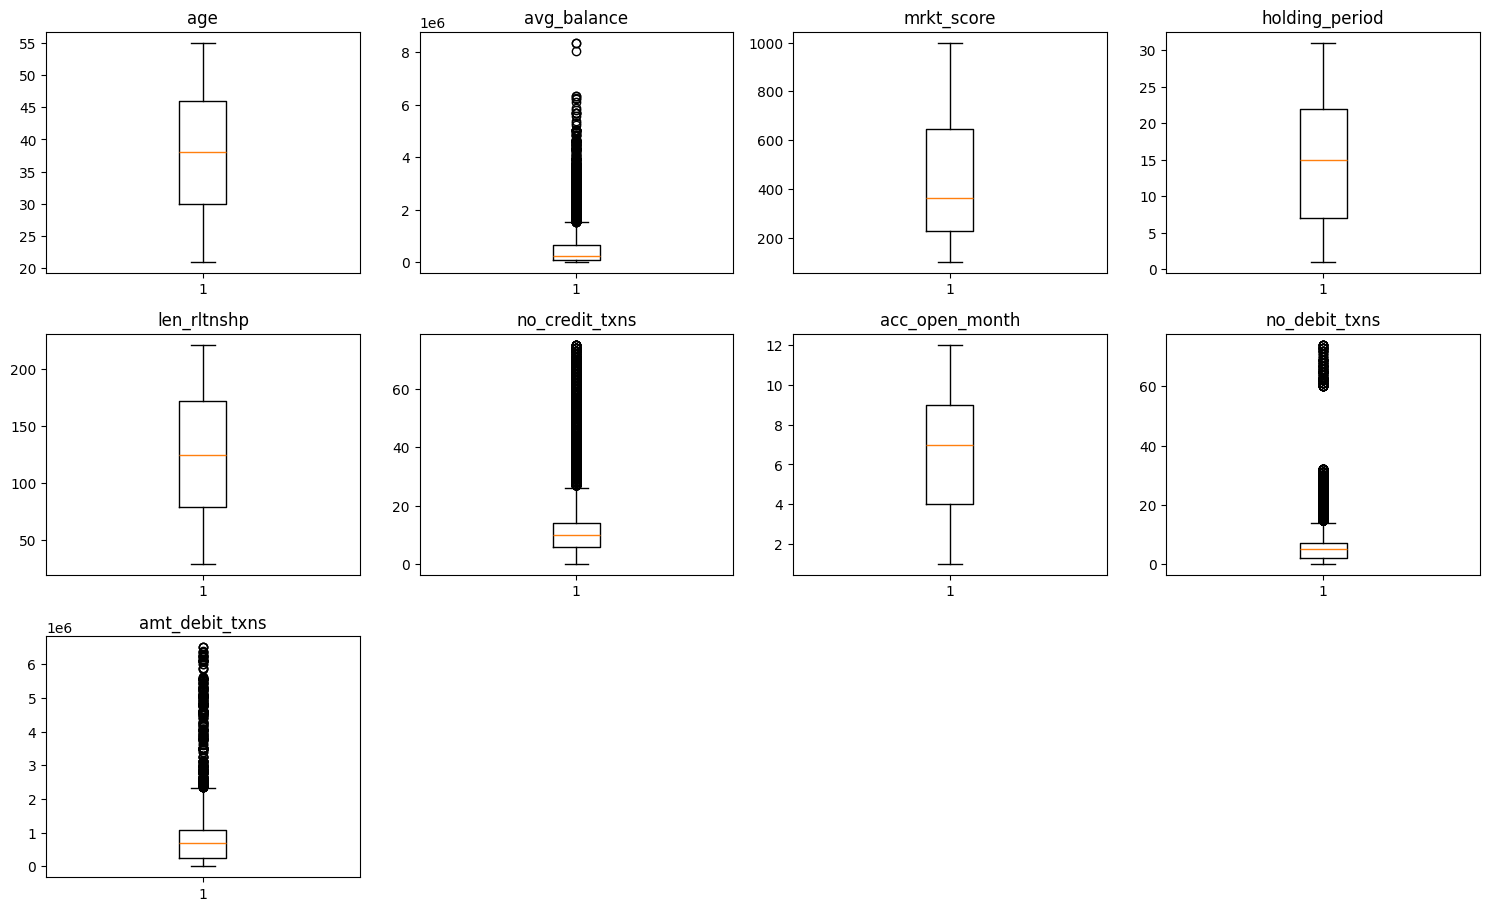

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("target")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

## Data Preparation for modeling

- We want to predict which lead is more likely to respond to marketing.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = data.drop(["target"], axis=1)
Y = data["target"]

X = pd.get_dummies(X, columns=["gender", "occupation", "acc_type"], drop_first=True)

X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=0
)

y_train.reset_index(inplace = True, drop = True)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (14000, 19)
Shape of test set :  (6000, 19)
Percentage of classes in training set:
target
0    0.877214
1    0.122786
Name: proportion, dtype: float64
Percentage of classes in test set:
target
0    0.867833
1    0.132167
Name: proportion, dtype: float64


## Scaling the Data

In [ ]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

# **Model Building**

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will respond positively but in reality the customer wouldn't respond positively - Loss of resources
2. Predicting a customer will not respond positively but in reality the customer would have responded positively - Loss of opportunity

### Which case is more important?
* Losing a potential customer by predicting that a customer will not respond positively but in reality the customer was going to respond positively.

### How to reduce this loss i.e need to reduce False Negatives?

* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (with Statsmodel)

In [ ]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [ ]:
X_train_with_intercept.head()

,const,age,avg_balance,mrkt_score,holding_period,len_rltnshp,no_credit_txns,cc_holder,charges,nominee,old_loan,acc_open_month,no_debit_txns,amt_debit_txns,gender_M,gender_O,occupation_SAL,occupation_SELF-EMP,occupation_SENP,acc_type_SA
0,1.0,-1.293003,-0.518153,-0.399871,0.464121,-0.174470,-0.191460,-0.666366,-0.352843,0.334258,-0.995297,1.012100,-0.210828,-1.045988,-1.591159,-0.100141,-0.641430,-0.463298,1.691136,0.515691
1,1.0,1.529985,-0.606826,-0.651188,-0.460966,1.302841,-0.850612,-0.666366,2.834124,0.334258,1.004725,1.594987,-0.734741,-1.013002,0.628473,-0.100141,1.559016,-0.463298,-0.591319,0.515691
2,1.0,1.320874,1.679503,0.094785,-0.114058,0.682735,-0.438642,1.500677,-0.352843,0.334258,-0.995297,1.012100,-0.210828,-1.054440,-1.591159,-0.100141,-0.641430,-0.463298,1.691136,0.515691
3,1.0,0.379879,0.478019,-0.990266,-0.923509,0.992788,-0.356248,1.500677,-0.352843,0.334258,-0.995297,-0.445117,-0.079850,0.419634,0.628473,-0.100141,-0.641430,-0.463298,-0.591319,0.515691
4,1.0,-0.979338,-0.602580,-0.348012,-1.501688,0.099106,1.374026,-0.666366,2.834124,0.334258,1.004725,0.137769,2.670694,5.650236,0.628473,-0.100141,1.559016,-0.463298,-0.591319,-1.939146


In [ ]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

Optimization terminated successfully.
         Current function value: 0.342654
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                14000
Model:                          Logit   Df Residuals:                    13980
Method:                           MLE   Df Model:                           19
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                 0.07997
Time:                        13:28:27   Log-Likelihood:                -4797.2
converged:                       True   LL-Null:                       -5214.1
Covariance Type:            nonrobust   LLR p-value:                1.278e-164
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1713      0.030    -71.855      0.000      -2.231      -2.112
ag

### Checking Logistic Regression model performance on training set

In [ ]:
y_pred = LogisticReg.predict(X_train_with_intercept)
y_pred.head()

,0
0,0.051130
1,0.055727
2,0.086293
3,0.167485
4,0.241823


In [ ]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.877714,0.018615,0.561404,0.036036


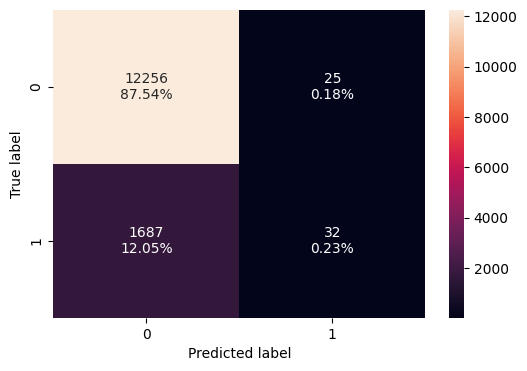

In [ ]:
plot_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

### Checking Logistic Regression model performance on test set

In [ ]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

,Accuracy,Recall,Precision,F1
0,0.867833,0.017654,0.5,0.034105


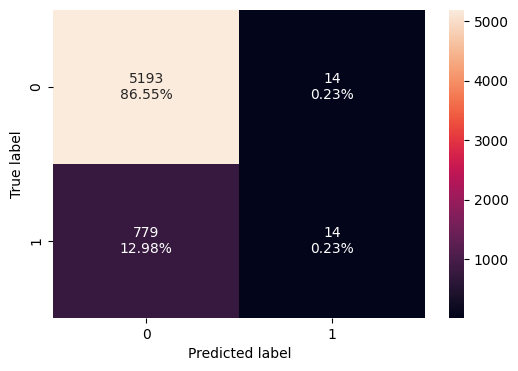

In [ ]:
plot_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

*  The Logistic Regression model has a poor performance on both training and test sets

## Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Checking Decision Tree Classifier performance on training set

In [ ]:
decision_tree_perf_train = model_performance_classification(
    dt_model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


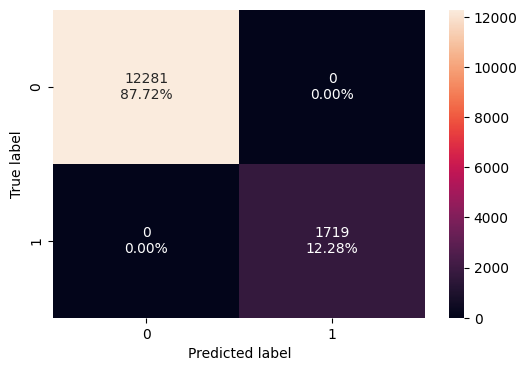

In [ ]:
plot_confusion_matrix(dt_model, X_train, y_train)

* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

### Checking Decision Tree Classifier performance on test set

In [ ]:
decision_tree_perf_test = model_performance_classification(
    dt_model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.930167,0.798235,0.709641,0.751335


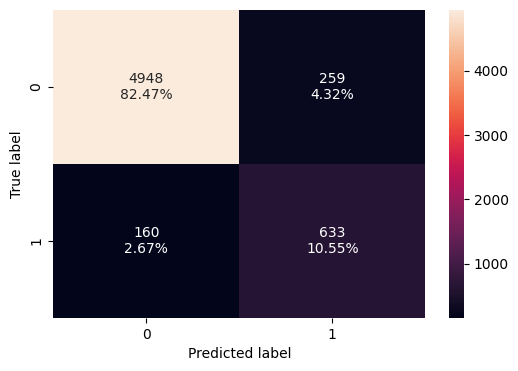

In [ ]:
plot_confusion_matrix(dt_model, X_test, y_test)

* The decision tree model is overfitting the data as expected and not able to generalize well on the test set.
* We will have to prune the decision tree.

# **Model Performance Improvement**

## Logistic Regression (deal with multicollinearity, remove high p-value variables, determine optimal threshold 	using ROC curve)

### Logistic Regression - Dealing with Multicollinearity

In [ ]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [ ]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train_with_intercept)

print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
               Variable       VIF
0                 const  1.000000
1                   age  1.025171
2           avg_balance  1.046566
3            mrkt_score  1.008846
4        holding_period  1.233930
5           len_rltnshp  1.004649
6        no_credit_txns  2.200695
7             cc_holder  1.004666
8               charges  1.067025
9               nominee  1.003118
10             old_loan  1.002505
11       acc_open_month  1.005722
12        no_debit_txns  2.220724
13       amt_debit_txns  1.402260
14             gender_M  1.149206
15             gender_O  1.097149
16       occupation_SAL  1.506187
17  occupation_SELF-EMP  1.364696
18      occupation_SENP  1.496769
19          acc_type_SA  1.645902


In [ ]:
# Dropping columns with VIF > 5 iteratively
while vif_result['VIF'].max() > 5:
    high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
    print(f"Dropping {high_vif_column} due to high VIF")
    X_train_scaled.drop(columns=high_vif_column, inplace=True)
    X_test_scaled.drop(columns=high_vif_column, inplace=True)
    vif_result = calculate_vif(X_train_scaled)

Since no variable has VIF > 5, we will keep the dataset as it is

### Dealing with high p-value variables

In [ ]:
# initial list of columns
predictors = X_train_with_intercept.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = SM.Logit(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    print(f"Dropping column {feature_with_p_max} with p-value: {max_p_value}")

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

Optimization terminated successfully.
         Current function value: 0.342654
         Iterations 7
Dropping column acc_type_SA with p-value: 0.7043888373326486
Optimization terminated successfully.
         Current function value: 0.342659
         Iterations 7
Dropping column gender_O with p-value: 0.5241709178948553
Optimization terminated successfully.
         Current function value: 0.342673
         Iterations 7
Dropping column nominee with p-value: 0.49417027988597806
Optimization terminated successfully.
         Current function value: 0.342690
         Iterations 7
Dropping column occupation_SENP with p-value: 0.3551852203704329
Optimization terminated successfully.
         Current function value: 0.342721
         Iterations 7
Dropping column age with p-value: 0.2552628103965966
Optimization terminated successfully.
         Current function value: 0.342767
         Iterations 7
Dropping column acc_open_month with p-value: 0.19711682175114642
Optimization terminated succ

In [ ]:
X_train_significant = X_train_with_intercept[selected_features]
X_test_significant = X_test_with_intercept[selected_features]
X_train_significant.head(10)

,const,avg_balance,mrkt_score,holding_period,len_rltnshp,no_credit_txns,cc_holder,old_loan,amt_debit_txns,gender_M,occupation_SAL,occupation_SELF-EMP
0,1.0,-0.518153,-0.399871,0.464121,-0.174470,-0.191460,-0.666366,-0.995297,-1.045988,-1.591159,-0.641430,-0.463298
1,1.0,-0.606826,-0.651188,-0.460966,1.302841,-0.850612,-0.666366,1.004725,-1.013002,0.628473,1.559016,-0.463298
2,1.0,1.679503,0.094785,-0.114058,0.682735,-0.438642,1.500677,-0.995297,-1.054440,-1.591159,-0.641430,-0.463298
3,1.0,0.478019,-0.990266,-0.923509,0.992788,-0.356248,1.500677,-0.995297,0.419634,0.628473,-0.641430,-0.463298
4,1.0,-0.602580,-0.348012,-1.501688,0.099106,1.374026,-0.666366,1.004725,5.650236,0.628473,1.559016,-0.463298
5,1.0,-0.613388,0.497690,0.926664,1.448749,-0.521036,-0.666366,-0.995297,-0.095586,0.628473,-0.641430,-0.463298
6,1.0,-0.071376,-0.575394,-0.923509,-0.739861,-1.015400,-0.666366,-0.995297,-1.081604,0.628473,-0.641430,-0.463298
7,1.0,-0.692064,-0.890537,1.389207,-0.210947,-0.356248,-0.666366,-0.995297,-0.616043,0.628473,1.559016,-0.463298
8,1.0,2.997587,-0.930429,0.926664,1.631133,-0.521036,-0.666366,-0.995297,-0.073647,-1.591159,-0.641430,-0.463298
9,1.0,0.095635,-0.802776,-0.692237,-0.685146,0.632480,1.500677,1.004725,1.690708,0.628473,-0.641430,-0.463298


### Training the Logistic Regression model again with only the significant features

In [ ]:
LogisticReg_tuned = SM.Logit(y_train, X_train_significant).fit()
print(LogisticReg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.342995
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                14000
Model:                          Logit   Df Residuals:                    13988
Method:                           MLE   Df Model:                           11
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                 0.07906
Time:                        13:28:30   Log-Likelihood:                -4801.9
converged:                       True   LL-Null:                       -5214.1
Covariance Type:            nonrobust   LLR p-value:                1.078e-169
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1678      0.030    -71.963      0.000      -2.227      -2.109
av

### Determining optimal threshold using ROC Curve

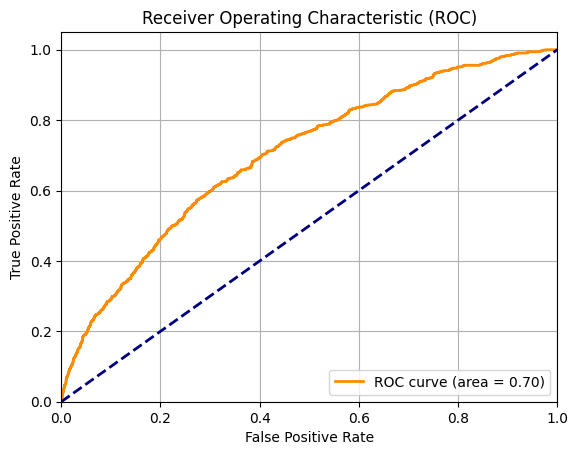

In [ ]:
y_pred = LogisticReg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.131


### Checking tuned Logistic Regression model performance on training set

In [ ]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit
)
logistic_reg_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.682571,0.606166,0.216677,0.31924


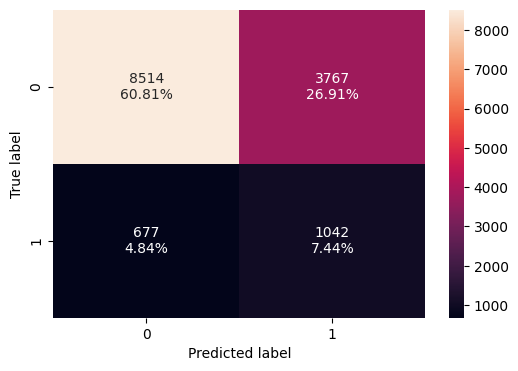

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit)

### Checking tuned Logistic Regression model performance on test set

In [ ]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit
)

logistic_reg_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.6845,0.624212,0.236842,0.343392


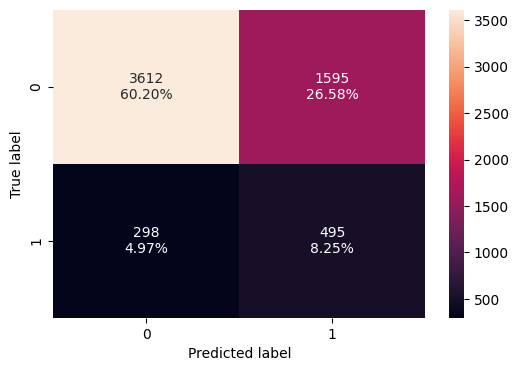

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit)

* The performance of the Logistic Regression model has improved considerably (on both training and test sets) by dropping variables with high p-values and setting an optimal threshold.

## Decision Tree Classifier (pre-pruning and post-pruning)

### Pre - pruning the tree

In [ ]:
# Choose the type of classifier.
dt_model_tuned_1 = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),                          ## Max Depth of the decision tree
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],               ## Maximum number of leaf nodes
    "min_samples_split": [2, 5, 7, 10, 20, 30],                ## Minimum number of samples required to split an internal node
    "class_weight": ['balanced', None]                         ## whether or not to used balanced weights for impurity computations
}

# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned_1, parameters, scoring='recall', cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned_1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=11,
                       max_leaf_nodes=100, random_state=42)

### Checking pre-pruned Decision Tree Classifier performance on training set

In [ ]:
dt_model_tuned_1_perf_train = model_performance_classification(
    dt_model_tuned_1, X_train, y_train
)
dt_model_tuned_1_perf_train

,Accuracy,Recall,Precision,F1
0,0.6695,0.898778,0.257586,0.400415


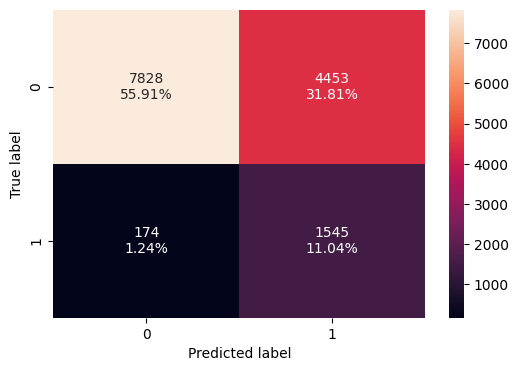

In [ ]:
plot_confusion_matrix(dt_model_tuned_1, X_train, y_train)

### Checking pre-pruned Decision Tree Classifier performance on test set

In [ ]:
dt_model_tuned_1_perf_test = model_performance_classification(
    dt_model_tuned_1, X_test, y_test
)
dt_model_tuned_1_perf_test

,Accuracy,Recall,Precision,F1
0,0.644167,0.807062,0.244088,0.374817


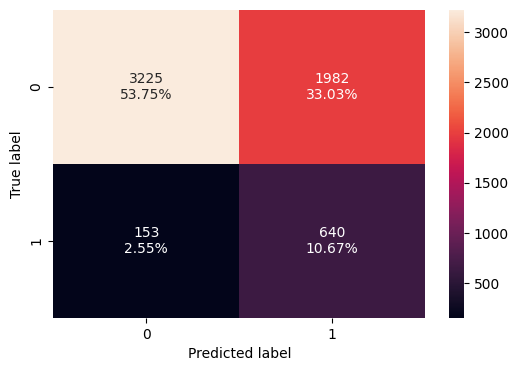

In [ ]:
plot_confusion_matrix(dt_model_tuned_1, X_test, y_test)

### Visualizing the Decision Tree

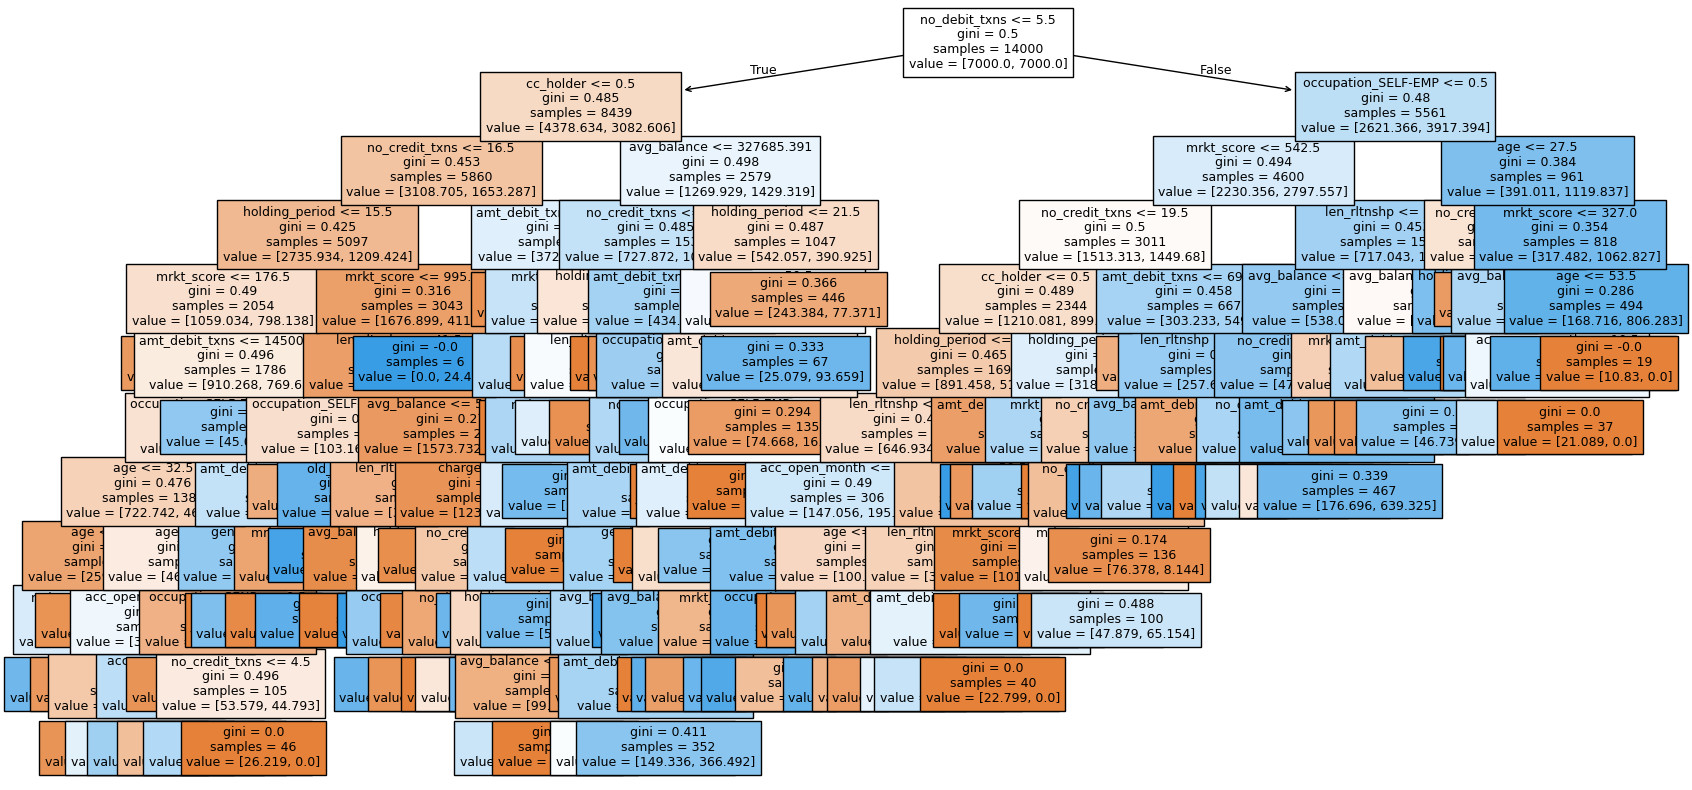

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned_1,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()



```
# This is formatted as code
```

### Analyzing Feature Importance for tuned Decision Tree Classifier

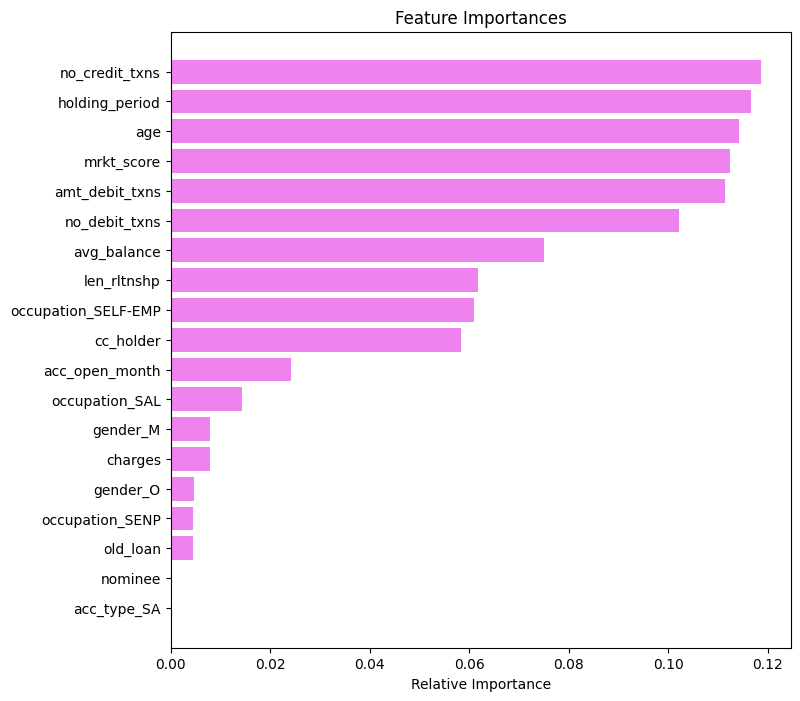

In [ ]:
# importance of features in the tree building

feature_names = X_train.columns.tolist()
importances = dt_model_tuned_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Post - pruning the tree

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000046,0.000139
2,0.000047,0.000279
3,0.000047,0.000421
4,0.000047,0.000562
...,...,...
463,0.001276,0.206936
464,0.001485,0.208421
465,0.001550,0.209971
466,0.002126,0.212097


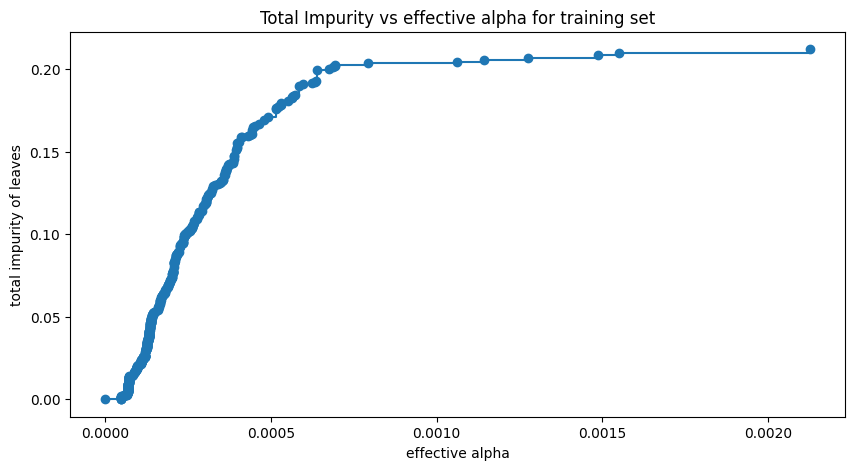

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
dt_models = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dt_model.fit(X_train, y_train)
    dt_models.append(dt_model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        dt_models[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.003321862170540202


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

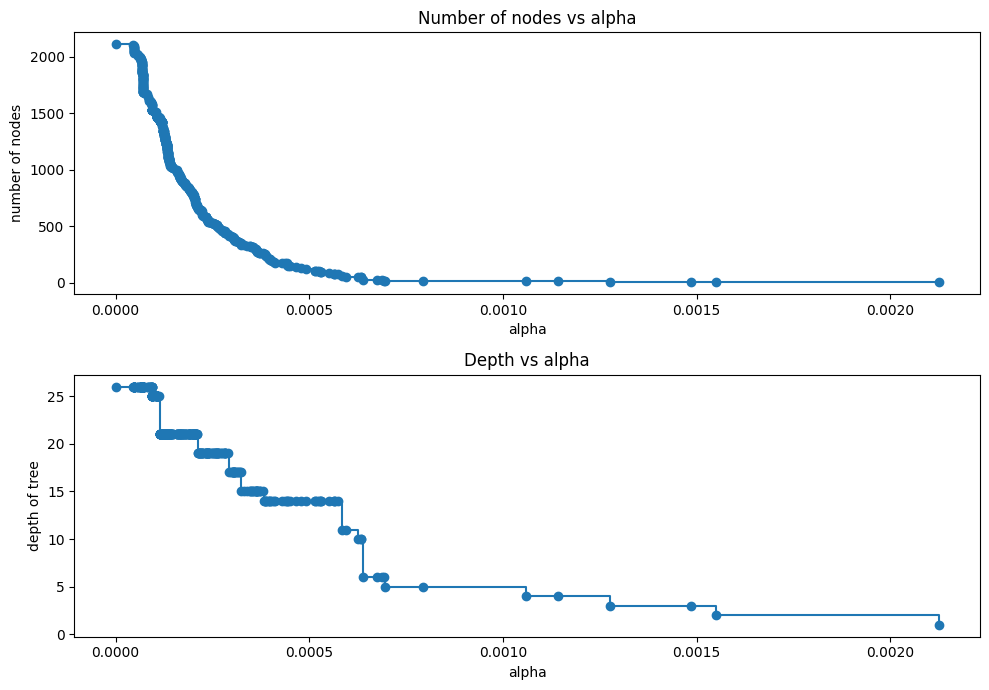

In [ ]:
dt_models = dt_models[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt_model.tree_.node_count for dt_model in dt_models]
depth = [dt_model.tree_.max_depth for dt_model in dt_models]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and test sets

In [ ]:
recall_train = []
for dt_mpdel in dt_models:
    pred_train = dt_model.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for dt_model in dt_models:
    pred_test = dt_model.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

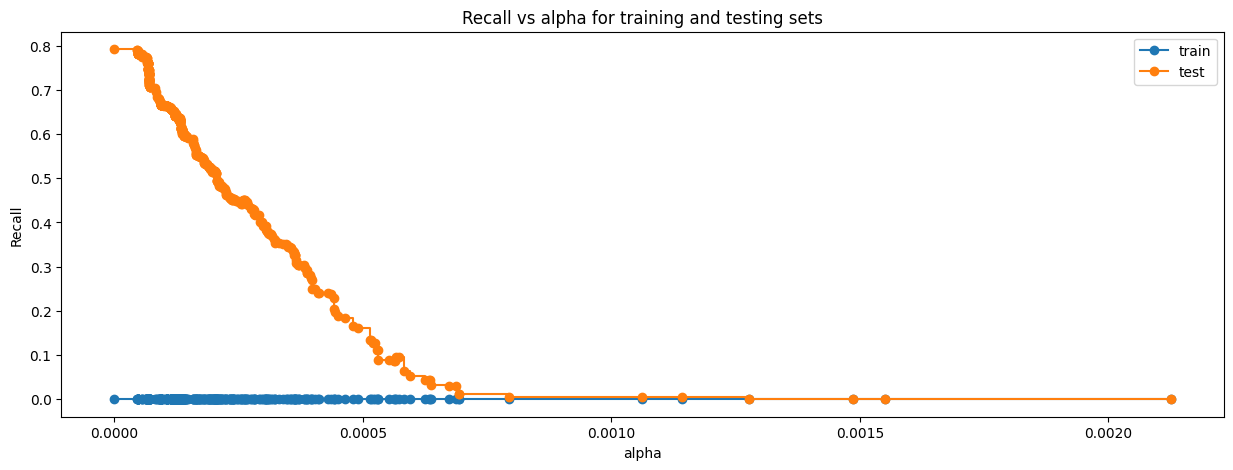

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
dt_model_post_pruned = dt_models[index_best_model]
print(dt_model_post_pruned)

DecisionTreeClassifier(random_state=1)


* Post-pruning using ccp alpha returns the same model as the initial model (Tree with no pruning).
* As post pruning model is the same as the initial decision tree mode, the performance and feature importance will also be the same.

In [ ]:
dt_model_tuned_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alpha, class_weight={0: 0.126, 1: 0.874}, random_state=1
)
dt_model_tuned_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.003321862170540202,
                       class_weight={0: 0.126, 1: 0.874}, random_state=1)

### Checking post-pruned Decision Tree Classifier performance on training set

In [ ]:
dt_model_tuned_2_perf_train = model_performance_classification(dt_model_tuned_2, X_train, y_train)
dt_model_tuned_2_perf_train

,Accuracy,Recall,Precision,F1
0,0.580286,0.698662,0.183107,0.290167


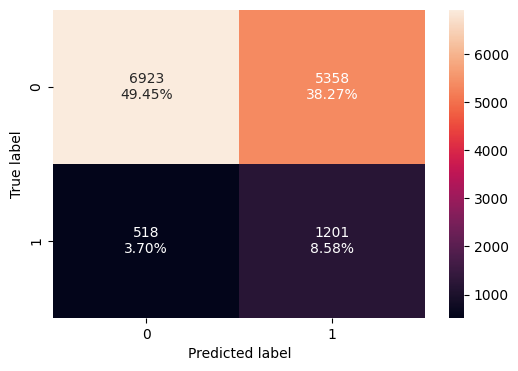

In [ ]:
plot_confusion_matrix(dt_model_tuned_2, X_train, y_train)

### Checking post-pruned Decision Tree Classifier performance on test set

In [ ]:
dt_model_tuned_2_perf_test = model_performance_classification(dt_model_tuned_2, X_test, y_test)
dt_model_tuned_2_perf_test

,Accuracy,Recall,Precision,F1
0,0.582333,0.692308,0.195304,0.304661


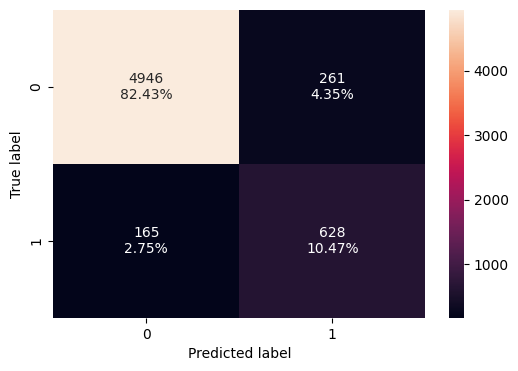

In [ ]:
plot_confusion_matrix(dt_model_post_pruned, X_test, y_test)  # Complete the code to get the confusion matrix on test data

### Visualizing the Decision Tree

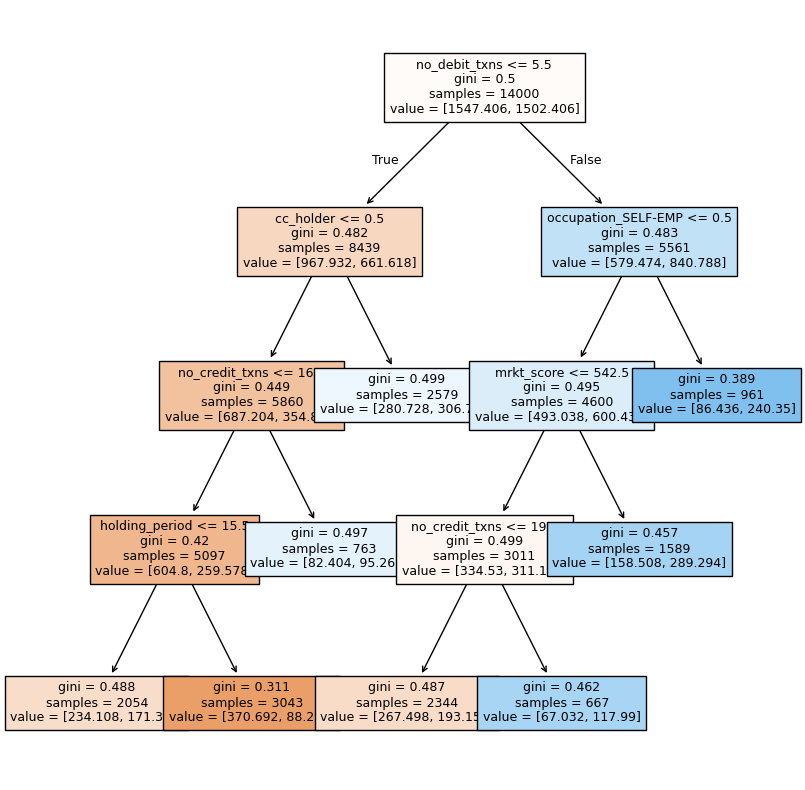

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    dt_model_tuned_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dt_model_tuned_2, feature_names=feature_names, show_weights=True))

|--- no_debit_txns <= 5.50
|   |--- cc_holder <= 0.50
|   |   |--- no_credit_txns <= 16.50
|   |   |   |--- holding_period <= 15.50
|   |   |   |   |--- weights: [234.11, 171.30] class: 0
|   |   |   |--- holding_period >  15.50
|   |   |   |   |--- weights: [370.69, 88.27] class: 0
|   |   |--- no_credit_txns >  16.50
|   |   |   |--- weights: [82.40, 95.27] class: 1
|   |--- cc_holder >  0.50
|   |   |--- weights: [280.73, 306.77] class: 1
|--- no_debit_txns >  5.50
|   |--- occupation_SELF-EMP <= 0.50
|   |   |--- mrkt_score <= 542.50
|   |   |   |--- no_credit_txns <= 19.50
|   |   |   |   |--- weights: [267.50, 193.15] class: 0
|   |   |   |--- no_credit_txns >  19.50
|   |   |   |   |--- weights: [67.03, 117.99] class: 1
|   |   |--- mrkt_score >  542.50
|   |   |   |--- weights: [158.51, 289.29] class: 1
|   |--- occupation_SELF-EMP >  0.50
|   |   |--- weights: [86.44, 240.35] class: 1



### Analyzing Feature Importance for tuned Decision Tree Classifier

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dt_model_tuned_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                          Imp
no_debit_txns        0.326419
no_credit_txns       0.180282
cc_holder            0.154144
holding_period       0.141871
occupation_SELF-EMP  0.108694
mrkt_score           0.088591
age                  0.000000
amt_debit_txns       0.000000
occupation_SENP      0.000000
occupation_SAL       0.000000
gender_O             0.000000
gender_M             0.000000
old_loan             0.000000
acc_open_month       0.000000
avg_balance          0.000000
nominee              0.000000
charges              0.000000
len_rltnshp          0.000000
acc_type_SA          0.000000


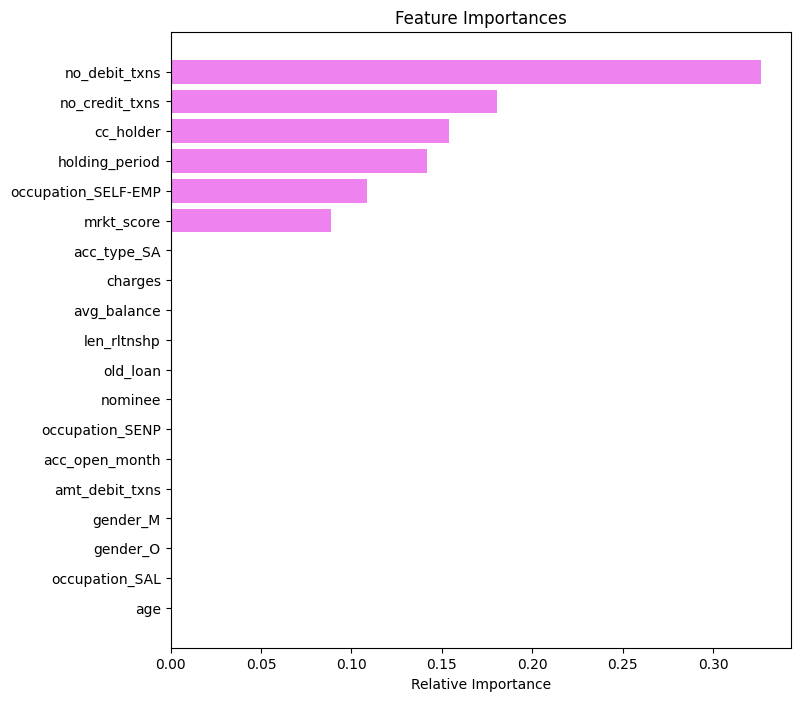

In [ ]:
importances = dt_model_tuned_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **Model Performance Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        decision_tree_perf_train.T,
        dt_model_tuned_1_perf_train.T,
        dt_model_tuned_2_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Improved",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Logistic Regression Improved,Decision Tree Base,Decision Tree Pre-Pruned,Decision Tree Post-Pruned
Accuracy,0.877714,0.682571,1.0,0.669500,0.580286
Recall,0.018615,0.606166,1.0,0.898778,0.698662
Precision,0.561404,0.216677,1.0,0.257586,0.183107
F1,0.036036,0.319240,1.0,0.400415,0.290167


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_test.T,
        logistic_reg_tune_perf_test.T,
        decision_tree_perf_test.T,
        dt_model_tuned_1_perf_test.T,
        dt_model_tuned_2_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Decision Tree Base,Decision Tree Pre-Pruned,Decision Tree Post-Pruned
Accuracy,0.867833,0.684500,0.930167,0.644167,0.582333
Recall,0.017654,0.624212,0.798235,0.807062,0.692308
Precision,0.500000,0.236842,0.709641,0.244088,0.195304
F1,0.034105,0.343392,0.751335,0.374817,0.304661


**Observations**
* Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
* Pre-pruned tree has given a generalized performance with the recall score of 0.89 and 0.80 on training and test set, respectively.
* The company can predict the interested leads better using the pre-pruned tree.

# **Actionable Insights and Recommendations**

## Actionable Insights

* **Target the right segment**: The campaign should target customers with a credit card, who have a higher number of debit transactions (both in terms of count and amount), and have a higher marketing score.

* **Tailor the marketing message**: Customers with a lower average monthly balance might be more receptive to a loan for a specific need, so the marketing message could target that.

* **Re-evaluate marketing score**: The marketing score seems to be a good indicator of who might respond positively, so it might be worth investigating how the score is generated and if it can be improved to better identify potential loan customers.

* **Consider including behavioral variables**: It might be helpful to explore including features based on customer behavior, such as the frequency of their banking activities or their preferred banking channels.

## Recommendations

* **Handle imbalanced classes**: The target variable is imbalanced (only 12.6% are responders). This can be addressed by techniques like oversampling or undersampling the data or using metrics like F1 score or ROC AUC which are suitable for imbalanced datasets.

* **Feature Engineering**: Explore creating new features based on existing ones. For instance, you could create a feature for the ratio of credit transactions to debit transactions.

* **Focus on the most promising customer segments**: Concentrate marketing efforts on customers with a higher likelihood of conversion, such as those with credit cards, higher transaction volumes, and favorable marketing scores.

* **Refine customer understanding**: Dig deeper into customer behavior and preferences. This can help tailor marketing messages and product offerings for maximum impact.

* **Test and iterate**: Continuously evaluate the model's performance and make adjustments as needed. Experiment with different targeting strategies and messaging to optimize results.

* **Invest in data quality**: Ensure the data used to build the model is accurate, complete, and up-to-date. High-quality data will lead to more reliable predictions.